# 数据分析

In [1]:
# 导入一些必须的第三方库
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scienceplots
import joblib
from pathlib import Path

plt.style.use(["science", "notebook"])

PROCESSED_DATA_DIR = Path("../dataset/processed")

,Model,Kappa,Recall,Runtime_s
0,$M_1$,93.73,93.96,20.4178
1,$M_2$,93.84,93.58,18.0452
2,$M_3$,93.93,93.68,17.5207
3,$M_4$,94.99,95.10,17.0690
4,$M_5$,96.19,96.20,0.0125
5,$M_6$,94.96,95.28,88.8562
6,$M_7$,95.75,96.45,89.2888
7,$M_8$,95.82,97.23,178.1434
8,$B_1$,93.47,93.97,5.0057
9,$B_2$,91.55,92.01,8.4413


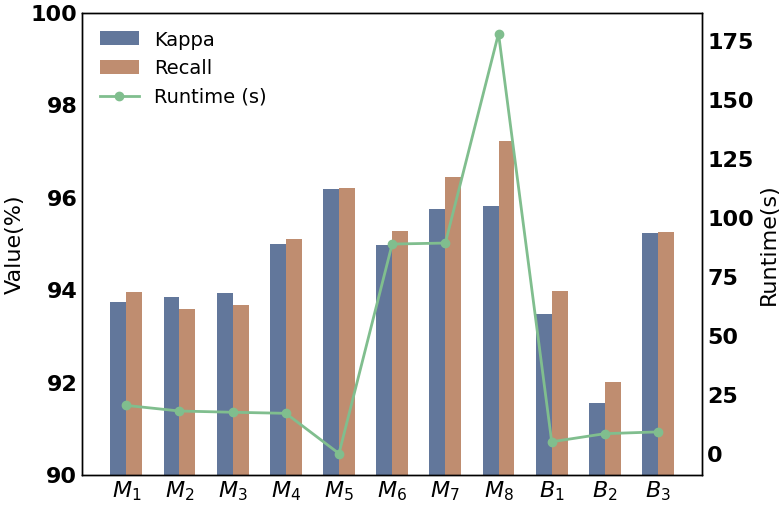

In [29]:
data = {
    'Model': [r'$M_1$', r'$M_2$', r'$M_3$', r'$M_4$', r'$M_5$', r'$M_6$', r'$M_7$', r'$M_8$', r"$B_1$", r"$B_2$", r"$B_3$"],
    'Kappa': [0.9373, 0.9384, 0.9393, 0.9499, 0.9619, 0.9496, 0.9575, 0.9582, 0.9347, 0.9155, 0.9523],
    'Recall': [0.9396, 0.9358, 0.9368, 0.9510, 0.9620, 0.9528, 0.9645, 0.9723, 0.9397, 0.9201, 0.9525],
    'Runtime_s': [20.4178, 18.0452, 17.5207, 17.0690, 0.0125, 88.8562, 89.2888, 178.1434, 5.0057, 8.4413, 9.1990]
}
df = pd.DataFrame(data)
df['Kappa'] = df['Kappa'] * 100
df['Recall'] = df['Recall'] * 100
df_long = pd.melt(
    df,
    id_vars=["Model"],
    value_vars=["Kappa", "Recall"],
    var_name="Metric",
    value_name="Value",
)
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(
    data=df_long, x="Model", y="Value", hue="Metric", palette=["#5975A4", "#CC8963"], ax=ax, width=0.6
)
ax.set_ylim(90, 100)
ax.set_xlabel("")
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
ax.set_ylabel("Value(%)", fontsize=16)
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
ax.tick_params(axis='y', length=0)
ax1 = ax.twinx()
ax1.plot(df["Model"], df["Runtime_s"], color="#80BE8E", marker='o', linestyle='-', linewidth=2, label='Runtime (s)')
ax1.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=False)
ax1.set_ylabel("Runtime(s)", fontsize=16)
ax1.tick_params(axis='y', length=0)

for label in ax1.get_yticklabels():
    label.set_fontweight('bold')
ax.legend_.remove()
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax1.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left', fontsize=14)
ax.yaxis.set_ticks_position('none')  # 不显示刻度线
plt.show()

In [12]:
inputs = joblib.load(PROCESSED_DATA_DIR / "inputs.joblib")
target = joblib.load(PROCESSED_DATA_DIR / "target.joblib")
preprocessor = joblib.load(PROCESSED_DATA_DIR / "preprocessor.joblib")

In [14]:
test_sizes = np.linspace(0.1, 0.9, 9)
test_sizes

array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.7s
[Pipeline]  (step 2 of 2) Processing RandomForestClassifier, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   1.2s
[Pipeline]  (step 2 of 2) Processing RandomForestClassifier, total=   0.1s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   1.8s
[Pipeline]  (step 2 of 2) Processing RandomForestClassifier, total=   0.1s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   2.4s
[Pipeline]  (step 2 of 2) Processing RandomForestClassifier, total=   0.1s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   2.8s
[Pipeline]  (step 2 of 2) Processing RandomForestClassifier, total=   0.1s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   3.4s
[Pipeline]  (step 2 of 2) Processing RandomForestClassifier, total=   0.2s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   3.9s
[Pipeline]  (step 2 of 2) Processing RandomForestClas

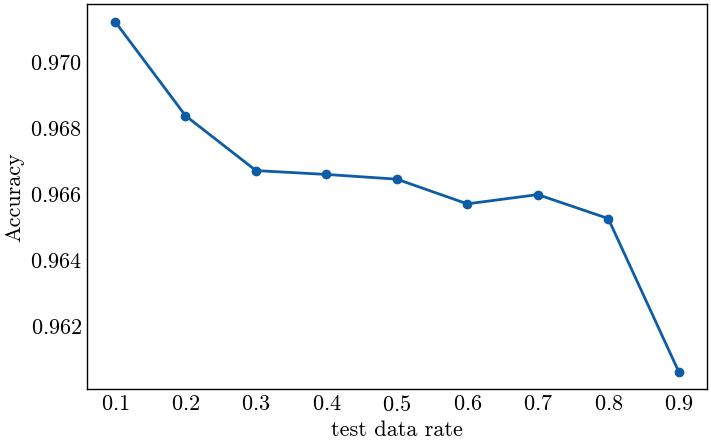

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracies = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        inputs, target, test_size=test_size, random_state=42
    )
    clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        (
            'RandomForestClassifier', 
            LogisticRegression(random_state=42)
        )
    ],
    # memory="cache",
    verbose=True,
)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(test_sizes, accuracies, marker='o', linestyle='-')
plt.xlabel("test data rate")
plt.ylabel("Accuracy")
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
plt.show()


## 读取数据集

In [3]:
df = pd.read_feather(PROCESSED_DATA_DIR / "processed_data.feather")
df.sample(3)

,location,employment_type,industry,fraudulent,department,telecommuting,has_company_logo,has_questions,required_experience,required_education,function,text,salary,text_length
1929,"US, CA, La Jolla",Full-time,Retail,0,Missing,0.0,1.0,0.0,Associate,Missing,Quality Assurance,qa engineer fast grow e commerce company fanta...,0.0,3750
9749,"US, MD, Annapolis",Contract,Real Estate,1,Missing,0.0,0.0,0.0,Missing,Missing,Missing,lawn maintenance contractor look contractor in...,0.0,695
8612,"US, CA, San Franscisco",Full-time,Nonprofit Organization Management,0,Missing,0.0,1.0,1.0,Director,Bachelor's Degree,Management,executive director missionthe bayview hunter p...,67500.0,6220


## 数据分析

### 单变量分析

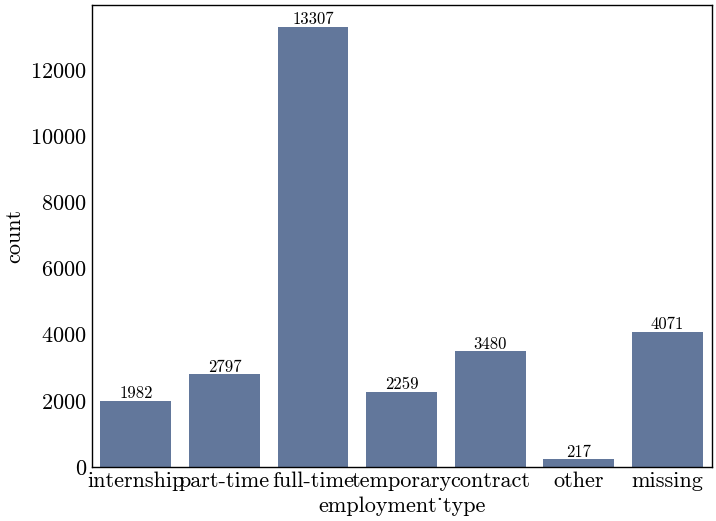

In [4]:
df['employment_type'] = df['employment_type'].str.lower()
ax = sns.countplot(df, x="employment_type", color="#5975A4")
ax.bar_label(ax.containers[0], fontsize=12);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
plt.show()

### 多变量分析

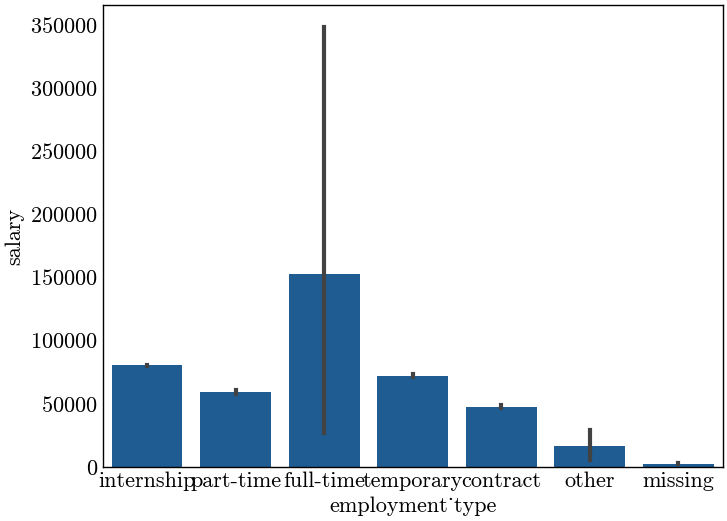

In [9]:
sns.barplot(df, x="employment_type", y="salary")
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
plt.show()

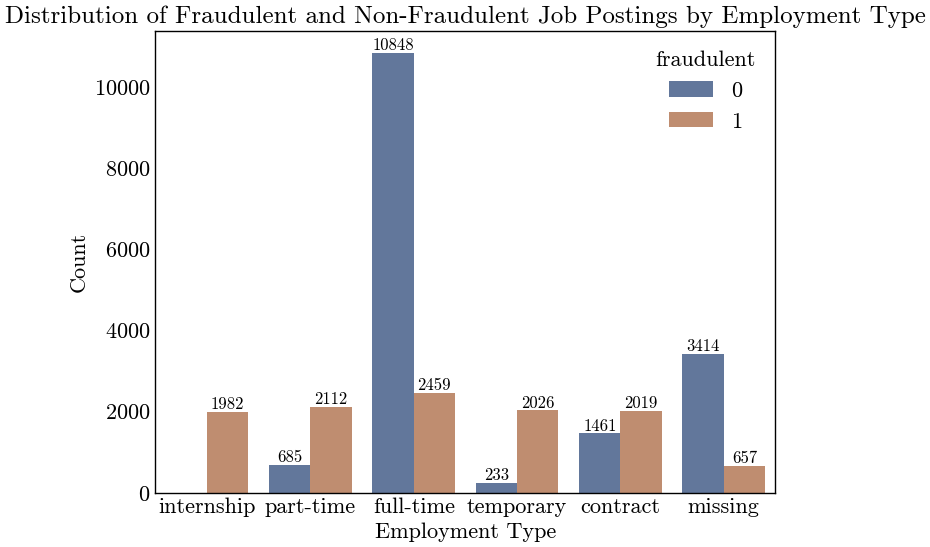

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
selected_employment_types = [
    "full-time",
    "part-time",
    "contract",
    "temporary",
    "internship",
    "missing",
]

filtered_df = df[df["employment_type"].isin(selected_employment_types)]
g = sns.countplot(
    data=filtered_df,
    x="employment_type",
    hue="fraudulent",
    width=0.8,
    palette=["#5975A4", "#CC8963"],
)
g.bar_label(g.containers[0], fontsize=12)
g.bar_label(g.containers[1], fontsize=12)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=True,
    labelleft=True,
)
ax.set_title(
    "Distribution of Fraudulent and Non-Fraudulent Job Postings by Employment Type",
    fontsize=18,
)
ax.set_xlabel("Employment Type", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
plt.show()

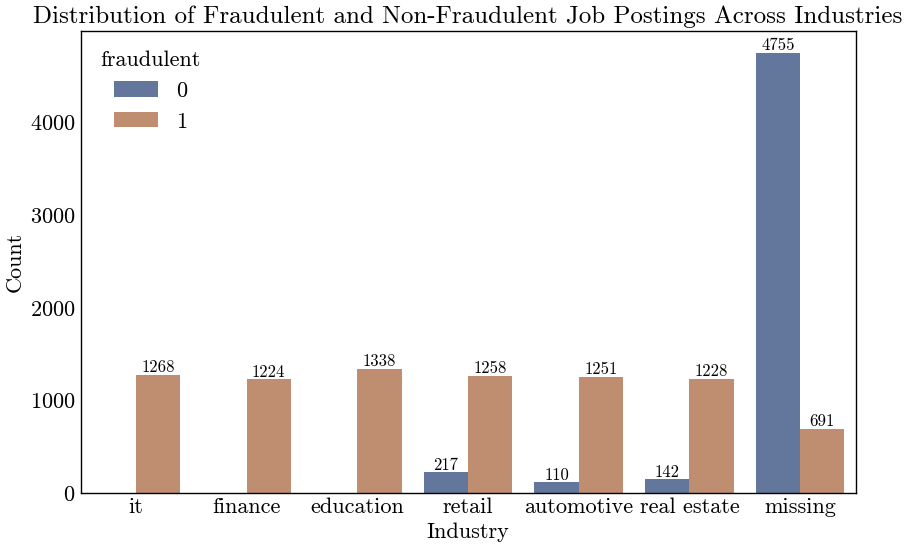

In [18]:
df["industry"] = df["industry"].str.lower()

top_industries = [
    "it",
    "missing",
    "education",
    "retail",
    "finance",
    "real estate",
    "automotive",
]
filtered_df_industry = df[df["industry"].isin(top_industries)]

fig, ax = plt.subplots(figsize=(10, 6))
g = sns.countplot(
    data=filtered_df_industry,
    x="industry",
    hue="fraudulent",
    width=0.8,
    palette=["#5975A4", "#CC8963"],
    ax=ax,
)
g.bar_label(g.containers[0], fontsize=12)
g.bar_label(g.containers[1], fontsize=12)

plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=True,
    labelleft=True,
)

ax.set_title(
    "Distribution of Fraudulent and Non-Fraudulent Job Postings Across Industries",
    fontsize=18,
)
ax.set_xlabel("Industry", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
plt.show()

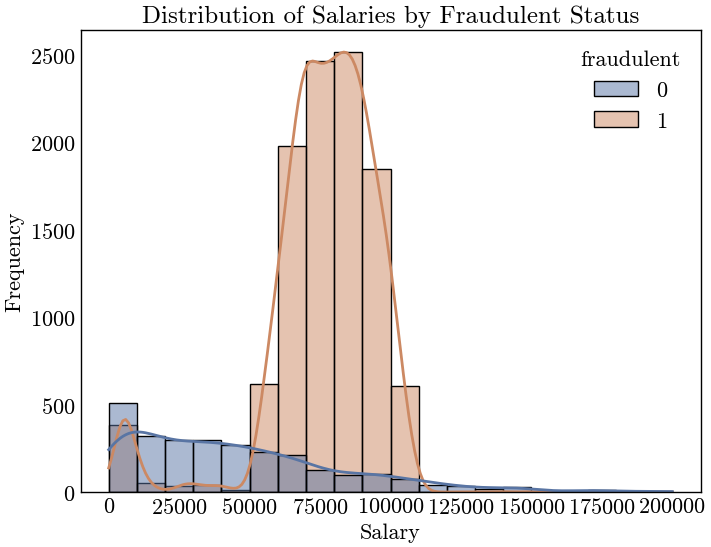

In [25]:
non_zero_salary_df = df[df["salary"] > 0].copy()

salary_threshold = 200000
non_zero_salary_df_filtered = non_zero_salary_df[
    non_zero_salary_df["salary"] <= salary_threshold
]
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(
    data=non_zero_salary_df_filtered,
    x="salary",
    hue="fraudulent",
    kde=True,
    ax=ax,
    bins=20,
    palette=["#5975A4", "#CC8963"],
)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=True,
    labelleft=True,
)
ax.set_title(f"Distribution of Salaries by Fraudulent Status", fontsize=18)
ax.set_xlabel("Salary", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
plt.show()

In [7]:
df[df["fraudulent"] == 1]["text_length"].describe()

count    11270.000000
mean       333.904082
std        497.006490
min         56.000000
25%        196.000000
50%        207.000000
75%        221.000000
max       7407.000000
Name: text_length, dtype: float64

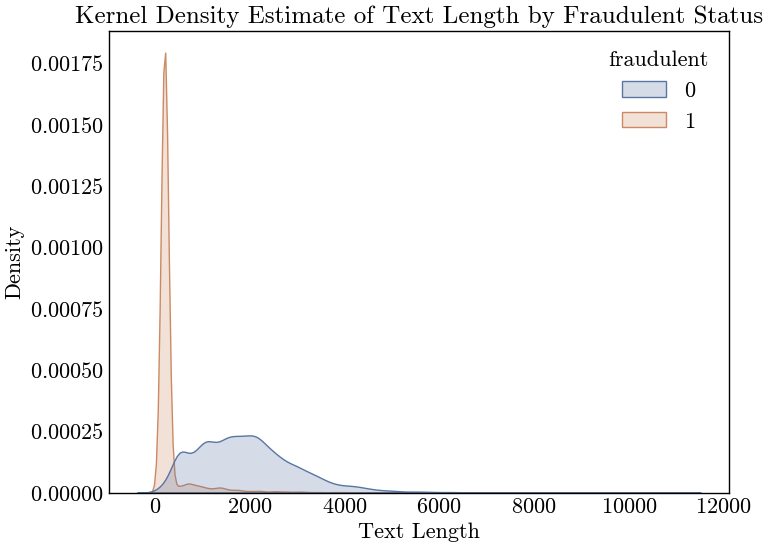

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(
    data=df,
    x="text_length",
    hue="fraudulent",
    fill=True,
    palette=["#5975A4", "#CC8963"],
    ax=ax
)
plt.title("Kernel Density Estimate of Text Length by Fraudulent Status", fontsize=18)
plt.xlabel("Text Length", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=True,
    labelleft=True,
)
plt.show()

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from PIL import Image
import numpy as np

text_column = 'text'
fraudulent_column = 'fraudulent'
fraudulent_text = df[df[fraudulent_column] == 1][text_column].str.lower().str.cat(sep=' ')
non_fraudulent_text = df[df[fraudulent_column] == 0][text_column].str.lower().str.cat(sep=' ')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha()]
    tokens = [w for w in tokens if not w in stop_words]
    return " ".join(tokens)

fraudulent_processed_text = preprocess_text(fraudulent_text)
non_fraudulent_processed_text = preprocess_text(non_fraudulent_text)
mask = np.array(Image.open("../static/image/mask.png"))

In [50]:
from wordcloud import WordCloud

wordcloud_settings = {
    'width': 800,
    'height': 400,
    'background_color': 'white',
    'stopwords': stop_words,
    'min_font_size': 10,
    "mask": mask
}
fraudulent_wordcloud = WordCloud(**wordcloud_settings).generate(fraudulent_processed_text)
non_fraudulent_wordcloud = WordCloud(**wordcloud_settings).generate(non_fraudulent_processed_text)

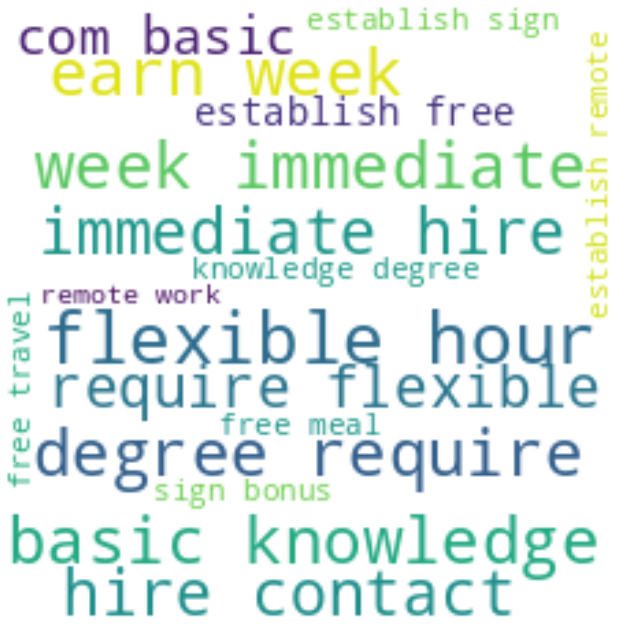

In [51]:
plt.figure(figsize=(10, 8))
plt.imshow(fraudulent_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

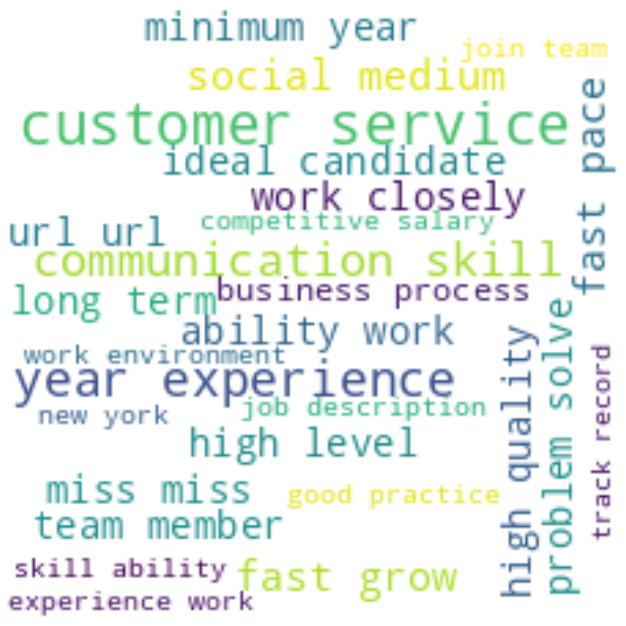

In [39]:
plt.figure(figsize=(12, 8))
plt.imshow(non_fraudulent_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

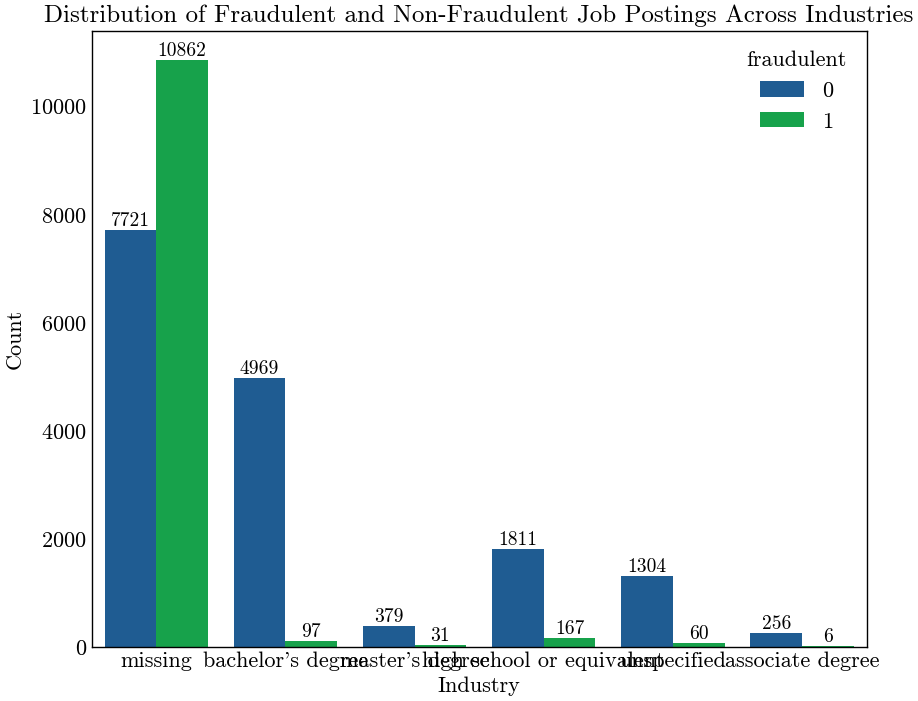

In [20]:
df["required_education"] = df["required_education"].str.lower()
education = df["required_education"].value_counts().index[:6]

df_filter = df[df["required_education"].isin(education)]
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(data=df_filter, x="required_education", hue="fraudulent", width=0.8)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 3,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=14)

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)

ax.set_title("Distribution of Fraudulent and Non-Fraudulent Job Postings Across Industries", fontsize=18)
ax.set_xlabel("Industry", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
plt.show()

In [22]:
df["required_education"].value_counts()

required_education
missing                              18583
bachelor's degree                     5066
high school or equivalent             1978
unspecified                           1364
master's degree                        410
associate degree                       262
certification                          164
some college coursework completed       99
professional                            73
vocational                              46
some high school coursework             27
doctorate                               26
vocational - hs diploma                  9
vocational - degree                      6
Name: count, dtype: int64

In [21]:
df["required_education"] = df["required_education"].str.lower()
mapping = {
    "bachelor's degree": "bachelor",
    "master's degree": "master",
    "associate degree": "associate"
}
df["required_education"] = df["required_education"].apply(mapping)
df["required_education"].value_counts()

AttributeError: 'bachelor' is not a valid function for 'Series' object

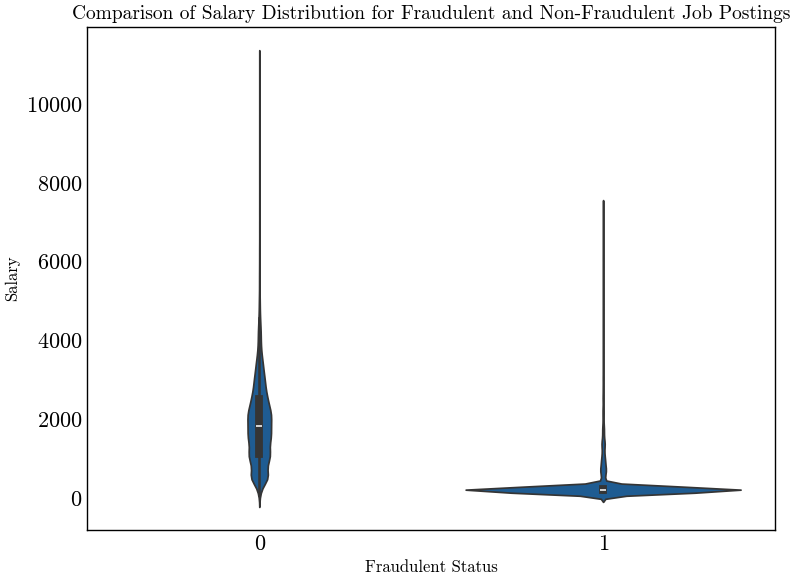

In [102]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='fraudulent', y='text_length')
plt.title('Comparison of Salary Distribution for Fraudulent and Non-Fraudulent Job Postings', fontsize=14)
plt.xlabel('Fraudulent Status', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
plt.tight_layout()
plt.show()

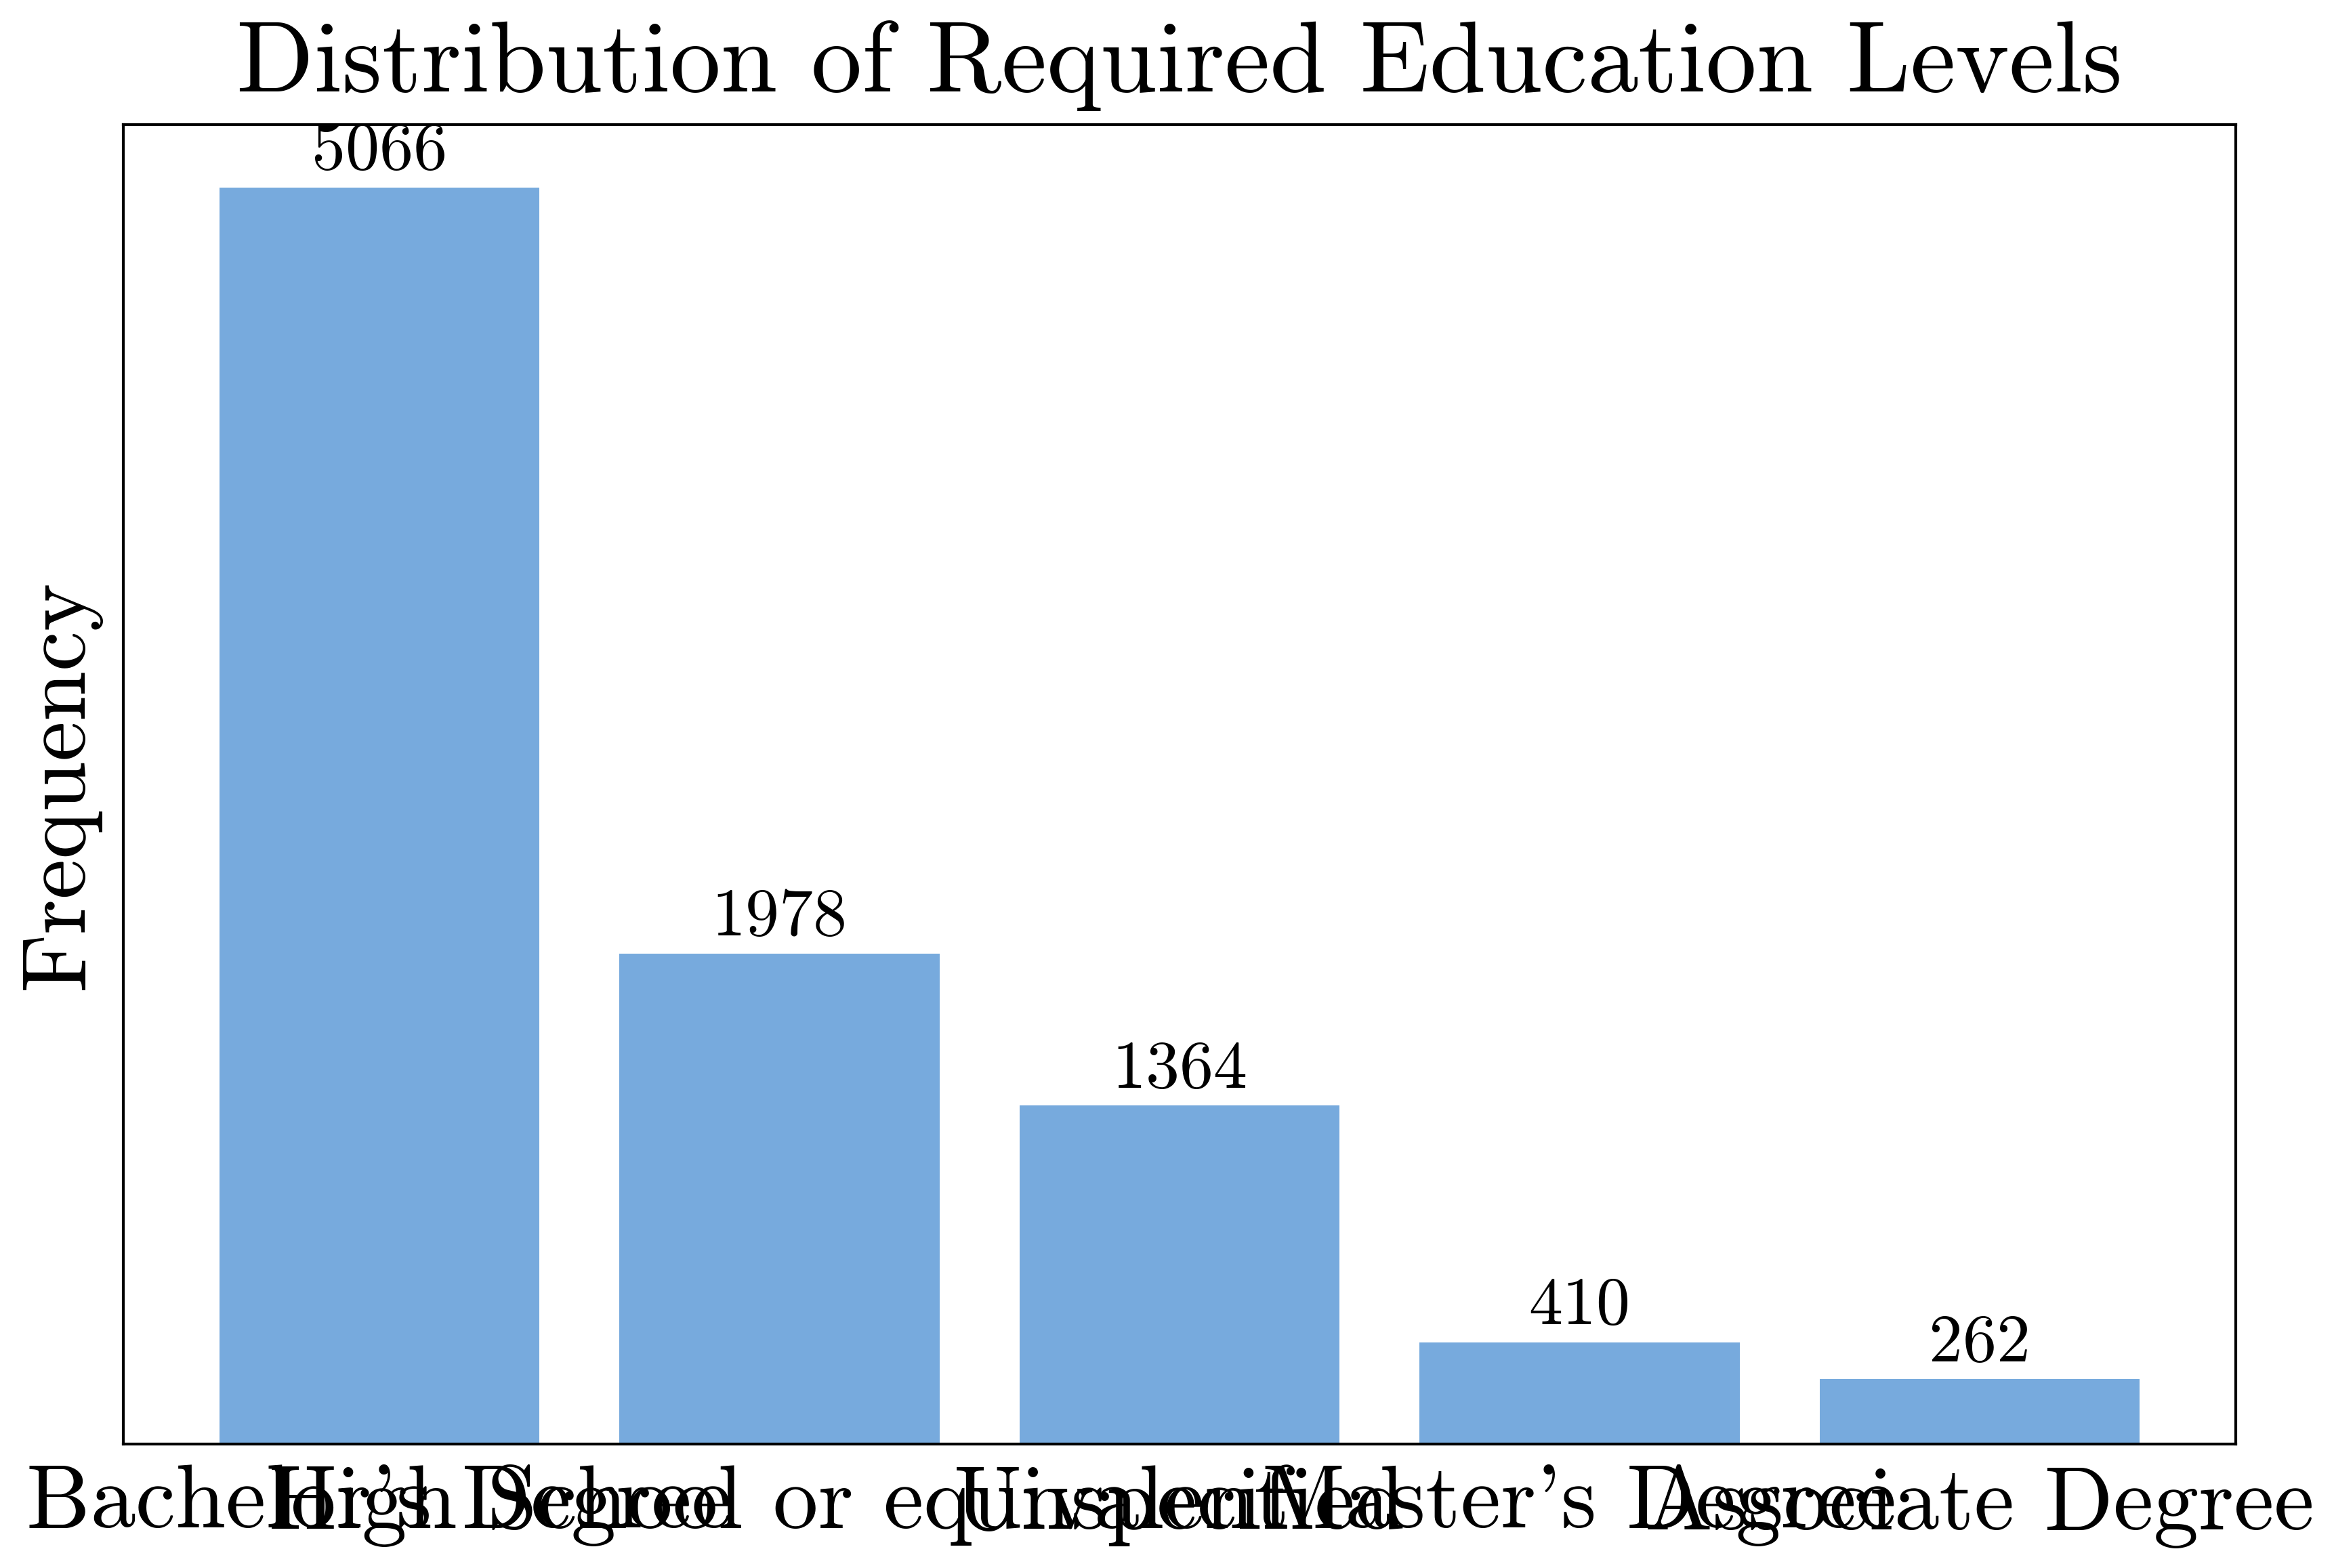

In [29]:
education = df["required_education"].value_counts()[1:6]
labels = education.index 
values = education.values

with plt.style.context(["science", "ieee", "no-latex", "light"]):
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(labels, values, align="center")
    ax.bar_label(bars, labels=[str(value) for value in values], fontsize=12, padding=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=False)
    ax.set_title("Distribution of Required Education Levels", fontsize=18)
    ax.set_ylabel("Frequency", fontsize=16)
    plt.tight_layout()
    plt.show()

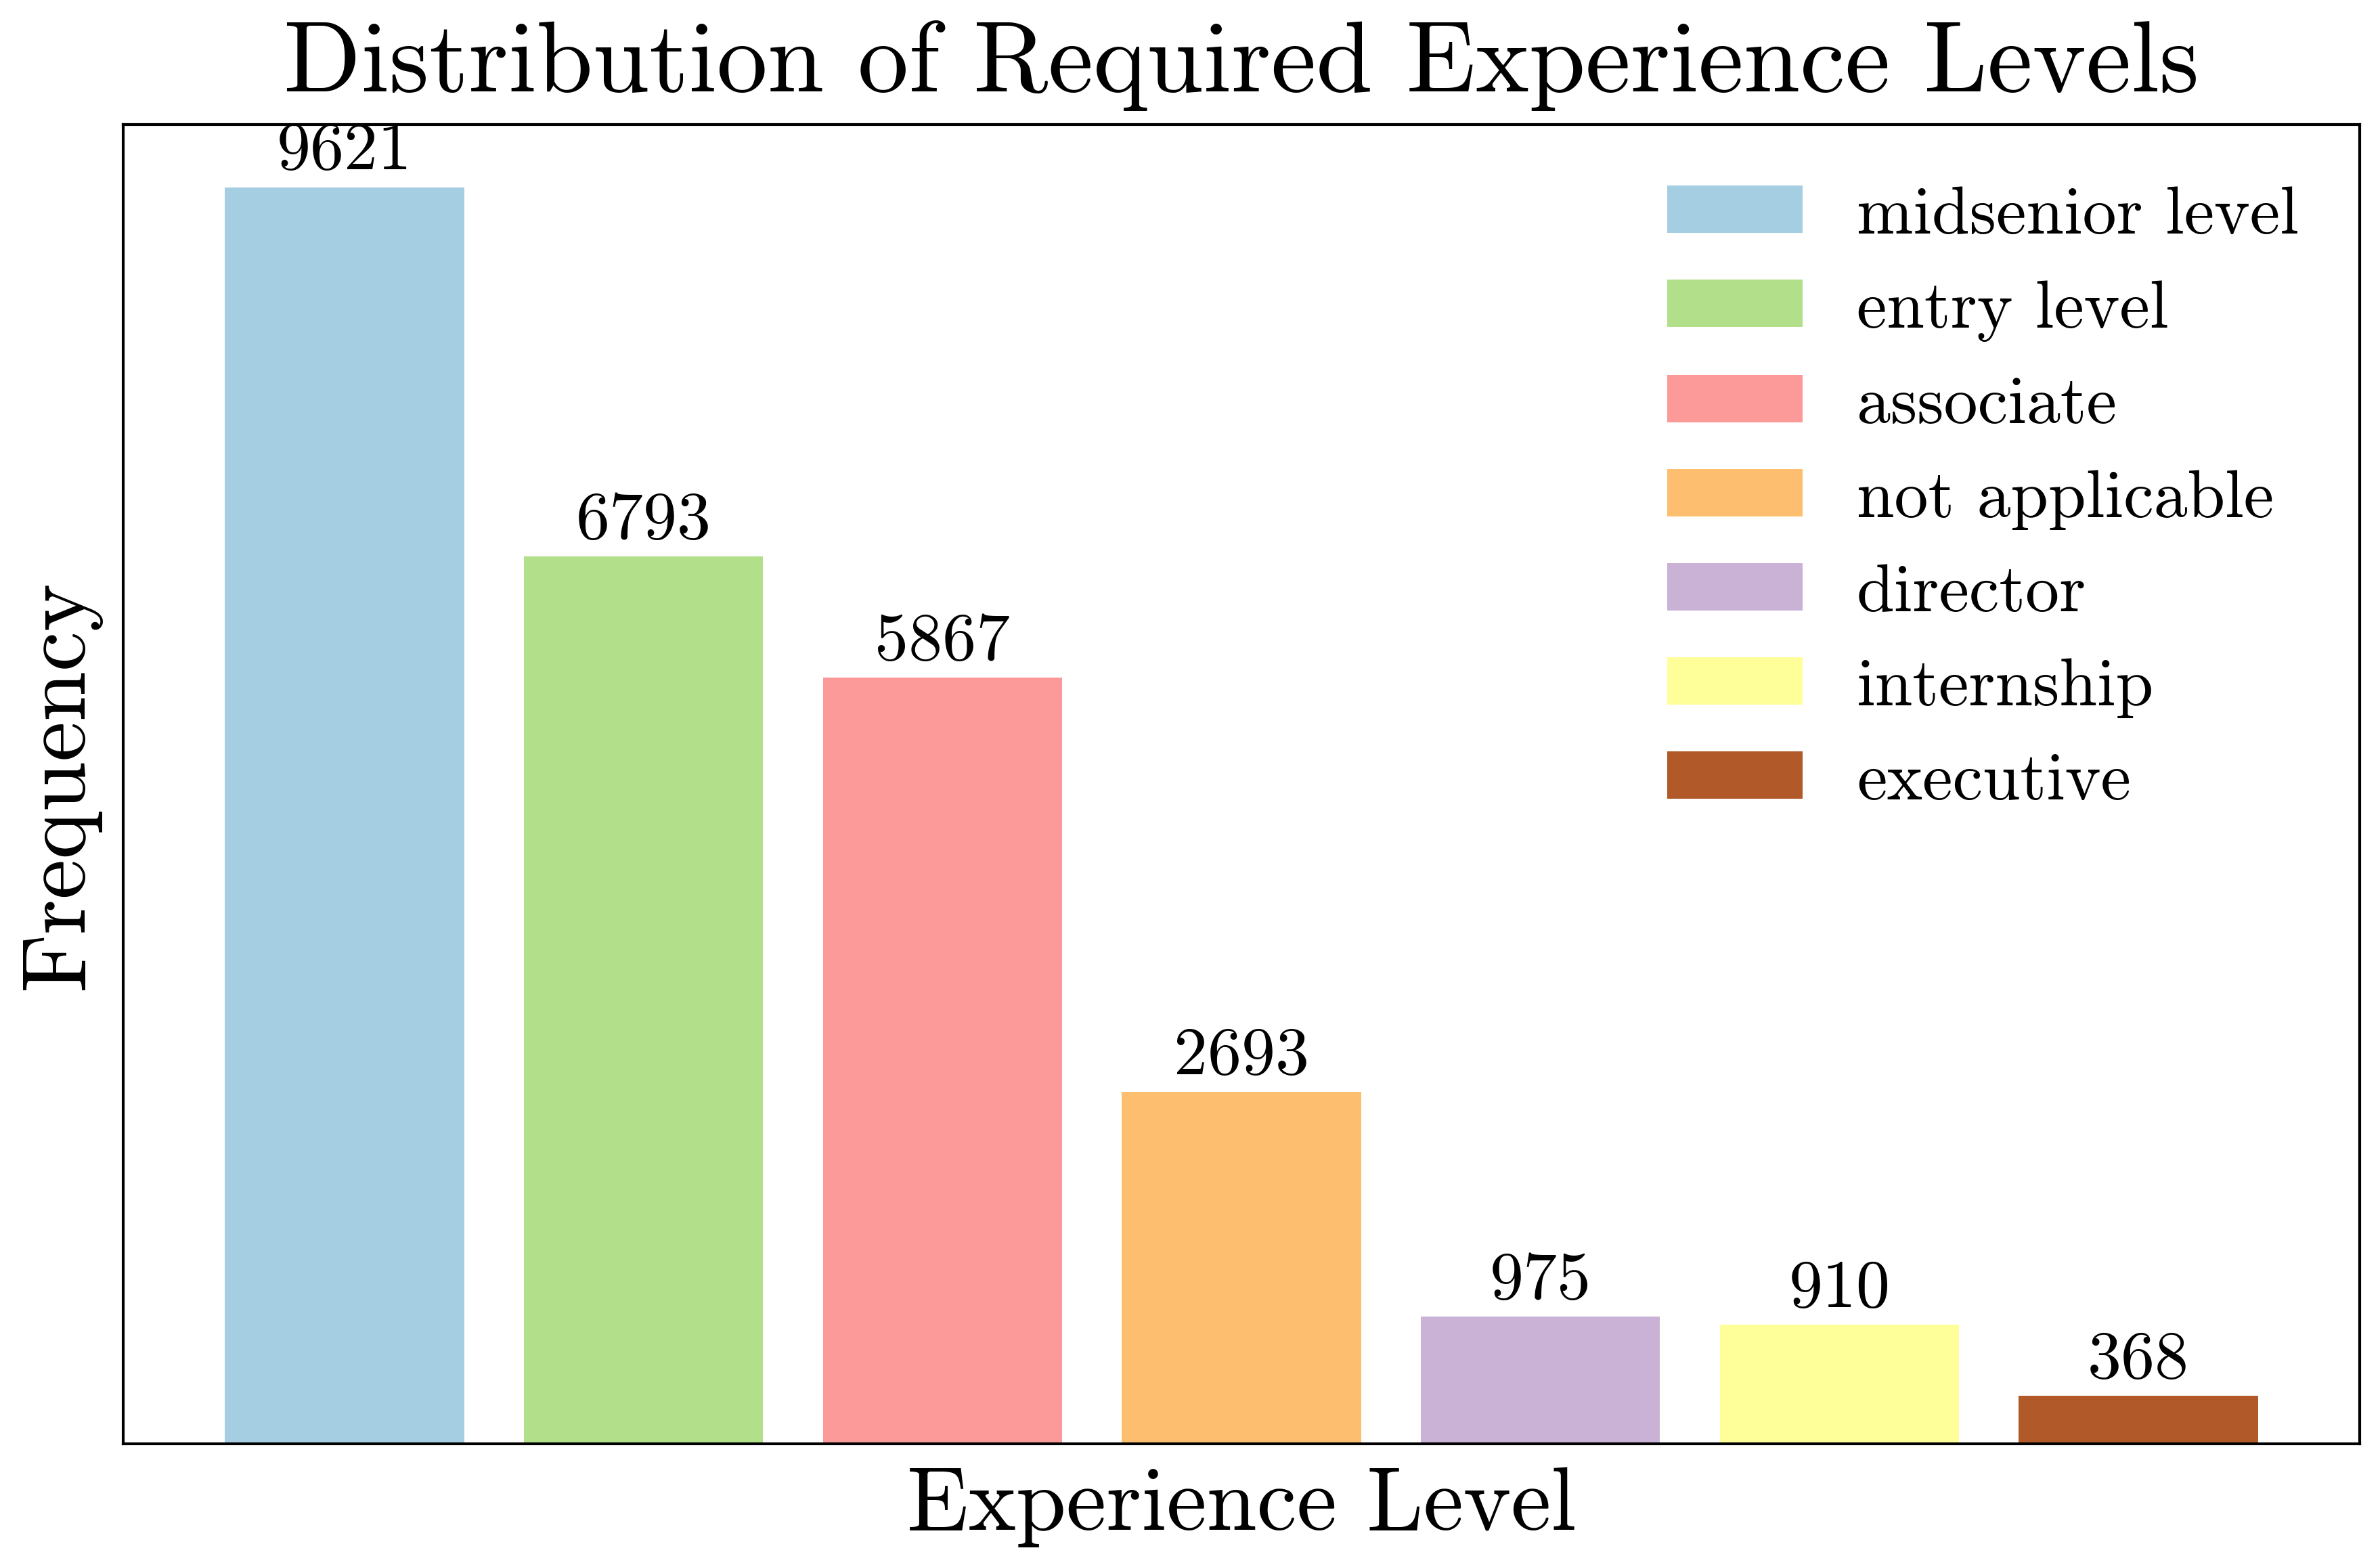

In [59]:
experience = df["required_experience"].value_counts()
labels = experience.index 
values = experience.values
colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))

with plt.style.context(["science", "ieee", "no-latex", "light"]):
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(labels, values, color=colors, align="center")
    ax.bar_label(bars, labels=[str(value) for value in values], fontsize=12, padding=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax.legend(bars, labels, loc="best", fontsize=12)
    ax.set_title("Distribution of Required Experience Levels", fontsize=18)
    ax.set_xlabel("Experience Level", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    plt.tight_layout()
    plt.show()

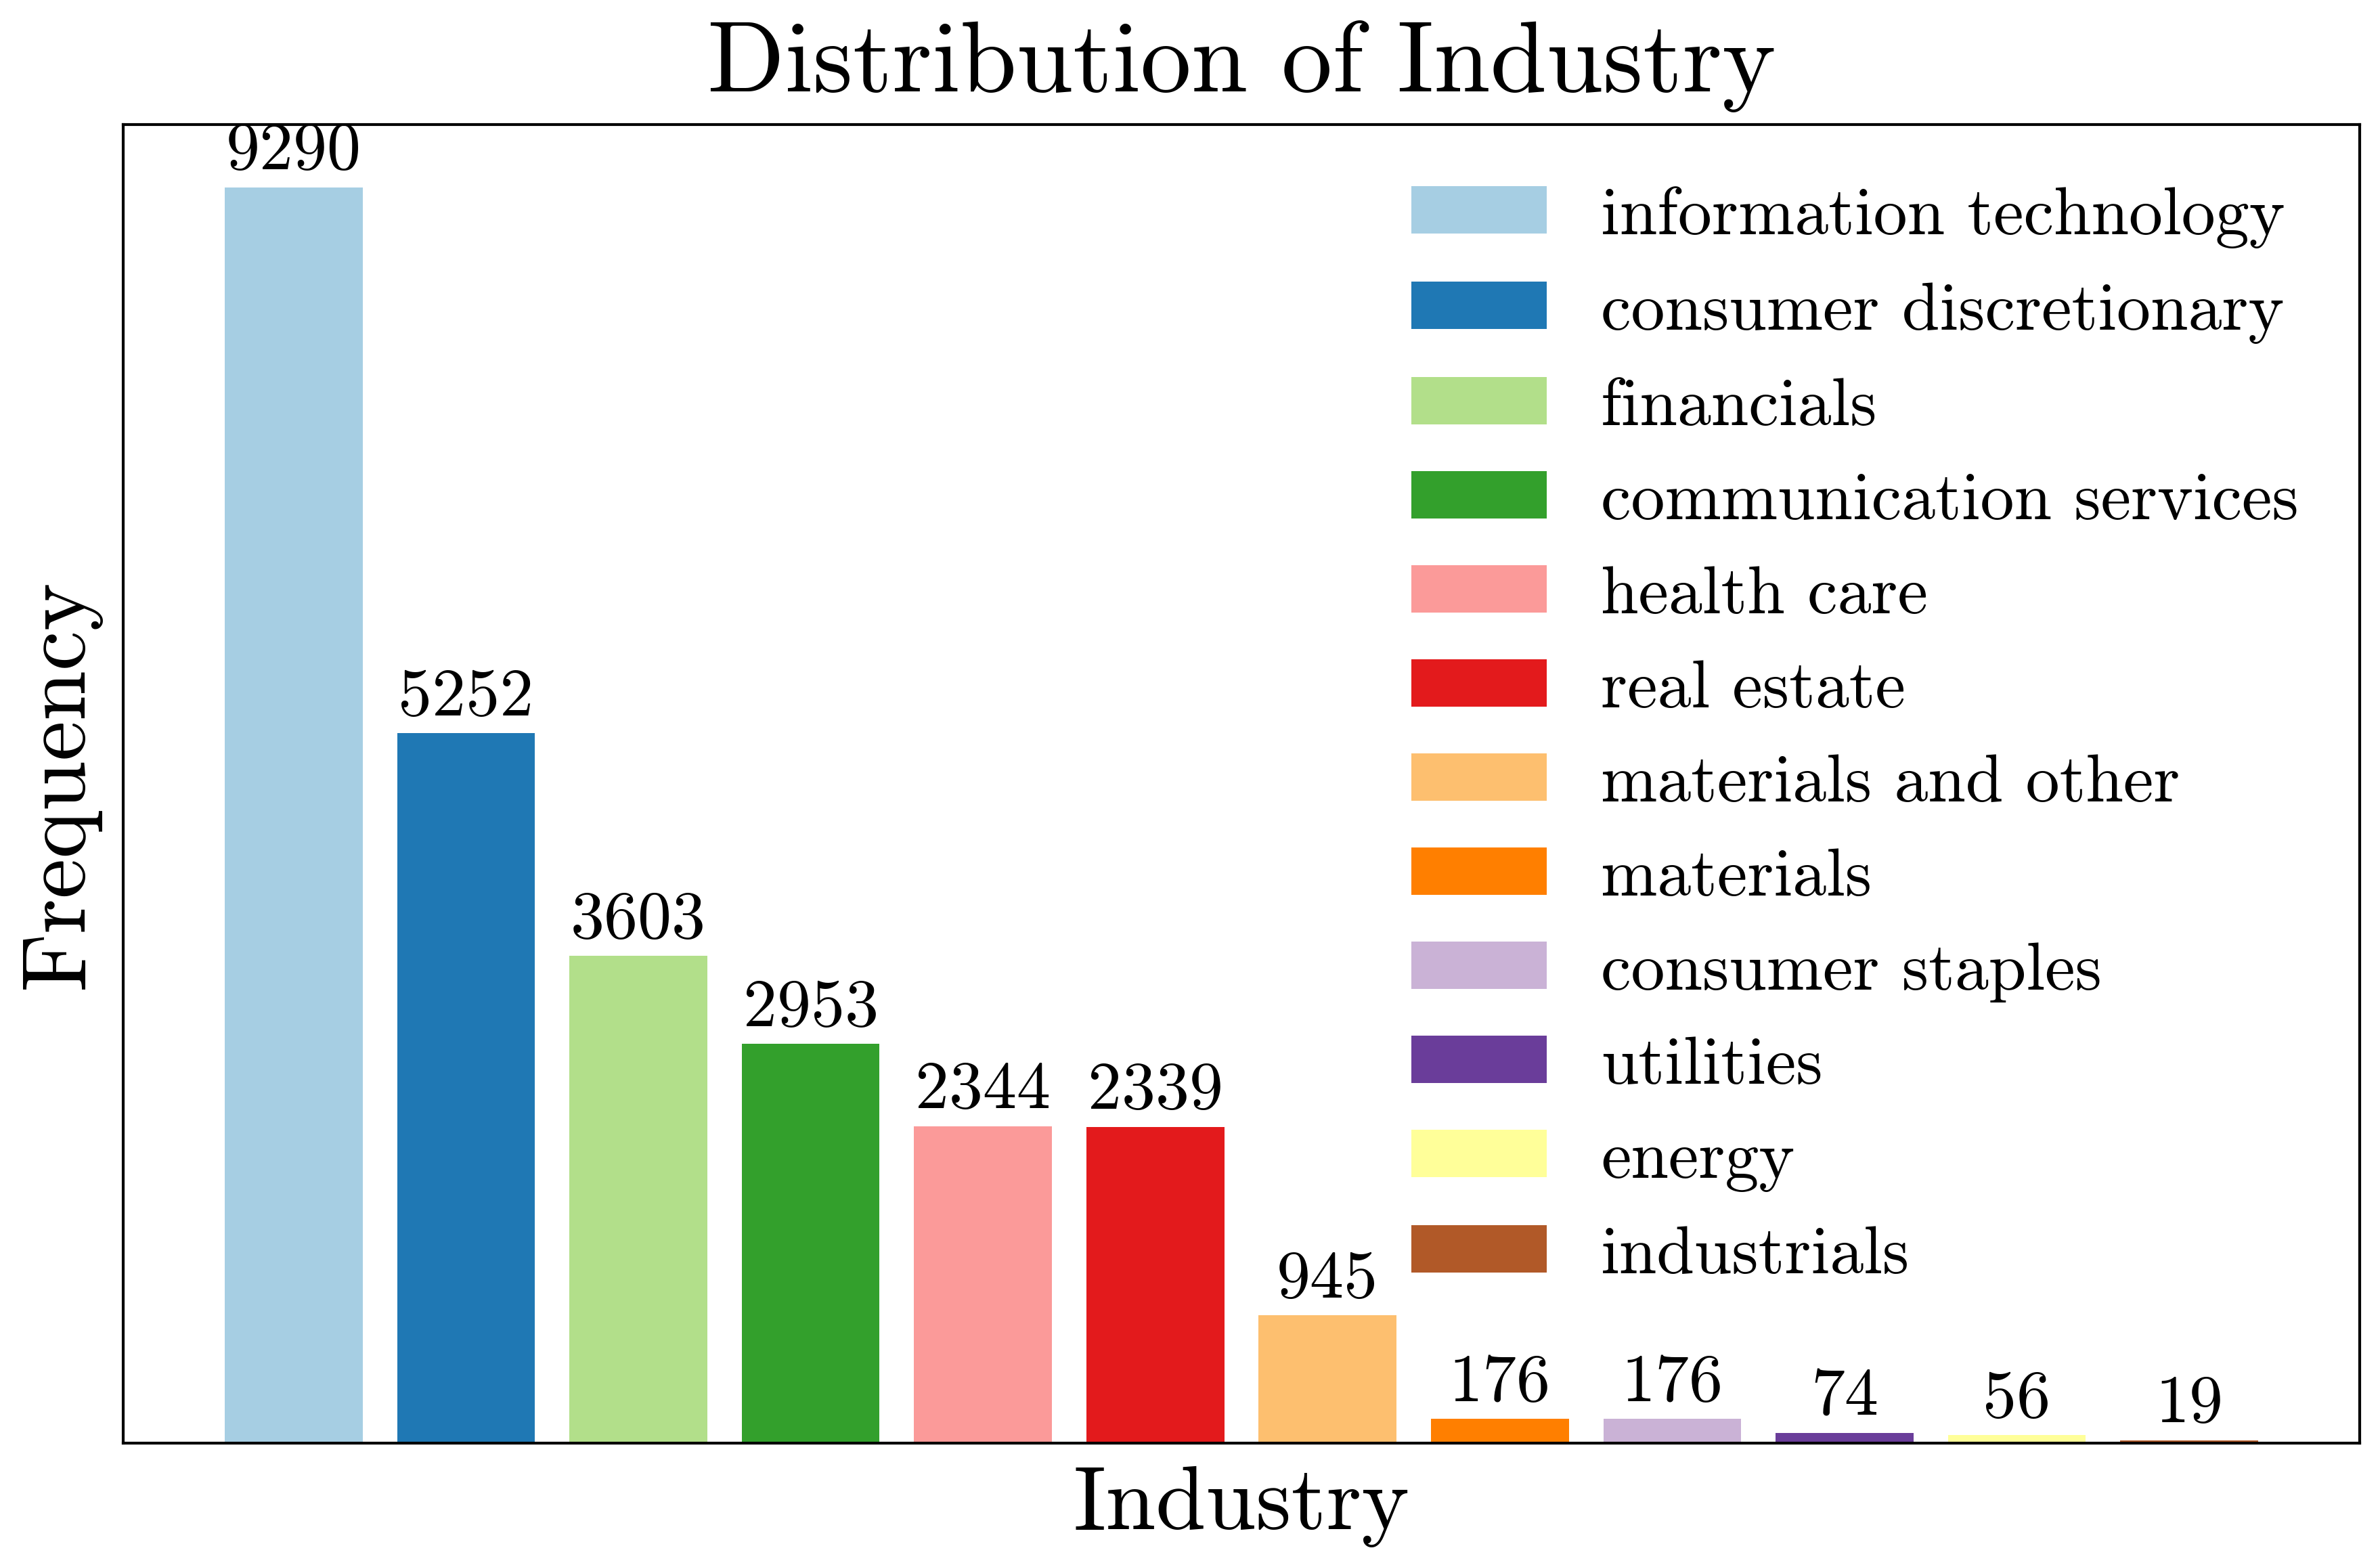

In [61]:
industry = df["industry"].value_counts()
labels = industry.index 
values = industry.values
colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))

with plt.style.context(["science", "ieee", "no-latex", "light"]):
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(labels, values, color=colors, align="center")
    ax.bar_label(bars, labels=[str(value) for value in values], fontsize=12, padding=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax.legend(bars, labels, loc="best", fontsize=12)
    ax.set_title("Distribution of Industry", fontsize=18)
    ax.set_xlabel("Industry", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    plt.tight_layout()
    plt.show()

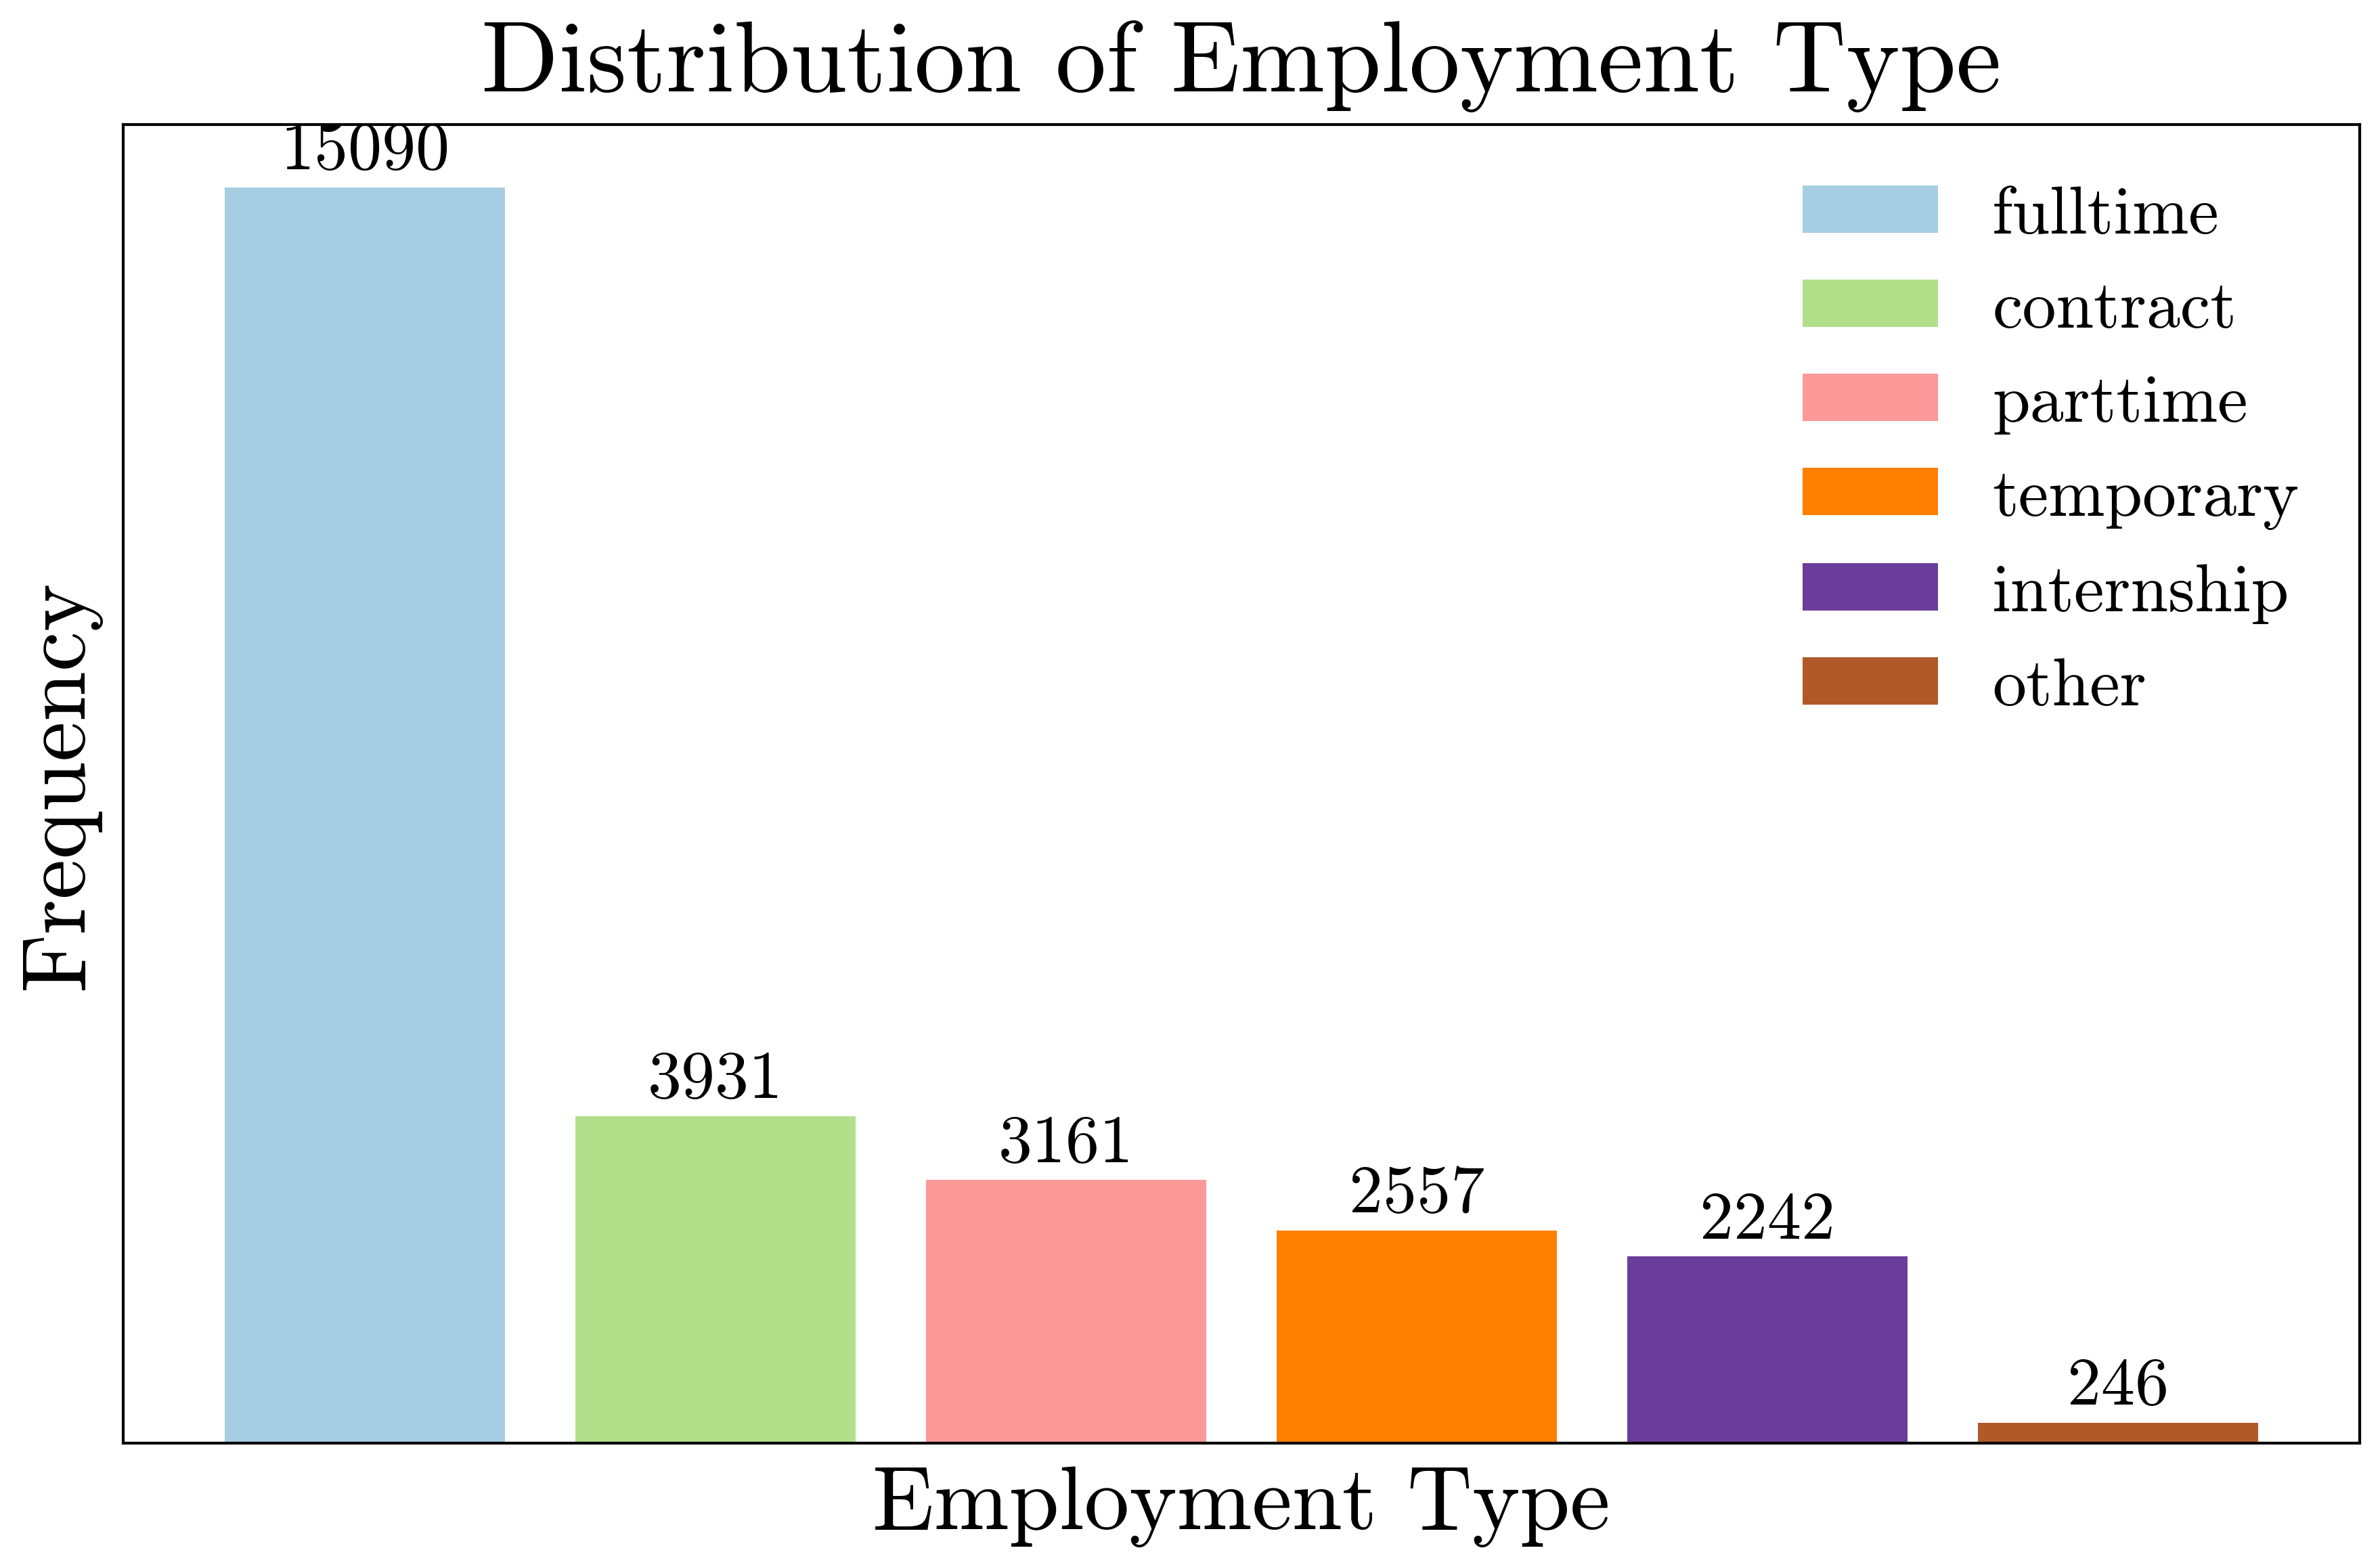

In [60]:
employment = df["employment_type"].value_counts()
labels = employment.index 
values = employment.values
colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))

with plt.style.context(["science", "ieee", "no-latex", "light"]):
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(labels, values, color=colors, align="center")
    ax.bar_label(bars, labels=[str(value) for value in values], fontsize=12, padding=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax.legend(bars, labels, loc="best", fontsize=12)
    ax.set_title("Distribution of Employment Type", fontsize=18)
    ax.set_xlabel("Employment Type", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    plt.tight_layout()
    plt.show()

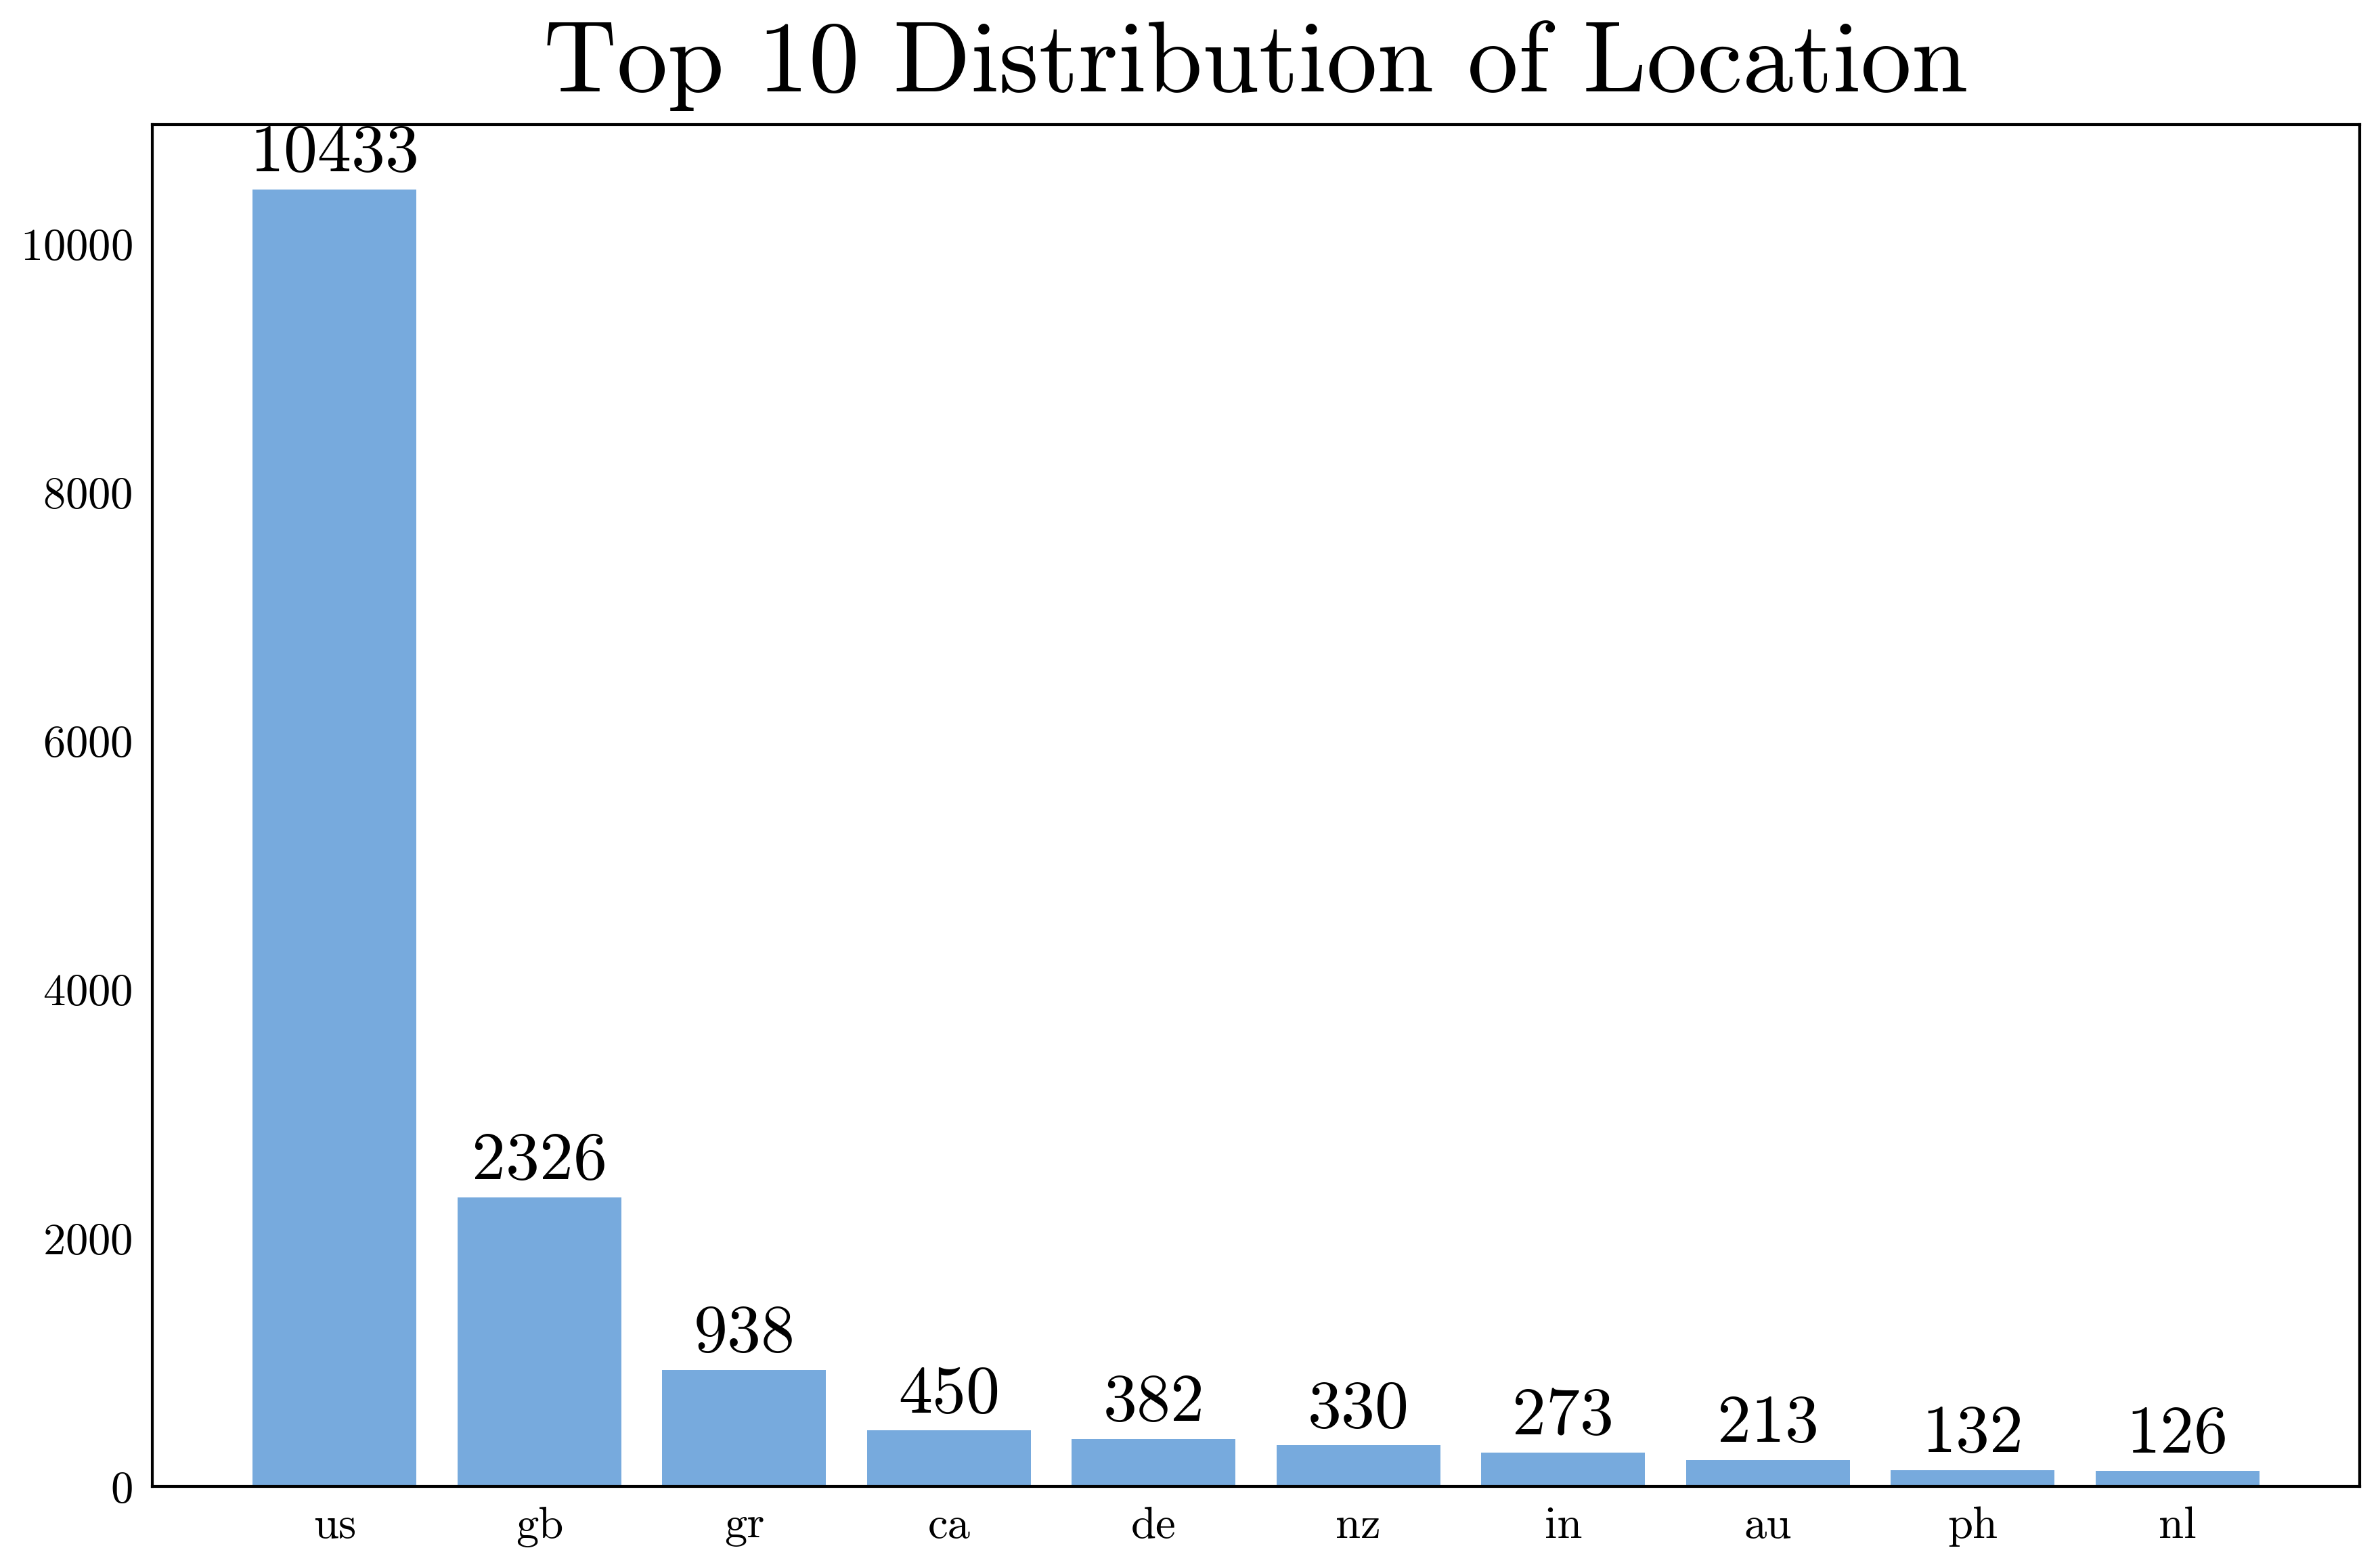

In [67]:
locations = df["location"].value_counts()[:10]
labels = locations.index 
values = locations.values

with plt.style.context(["science", "ieee", "no-latex", "light"]):
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(labels, values, align="center")
    ax.bar_label(bars, labels=[str(value) for value in values], fontsize=12, padding=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    ax.set_title("Top 10 Distribution of Location", fontsize=18)
    plt.tight_layout()
    plt.show()

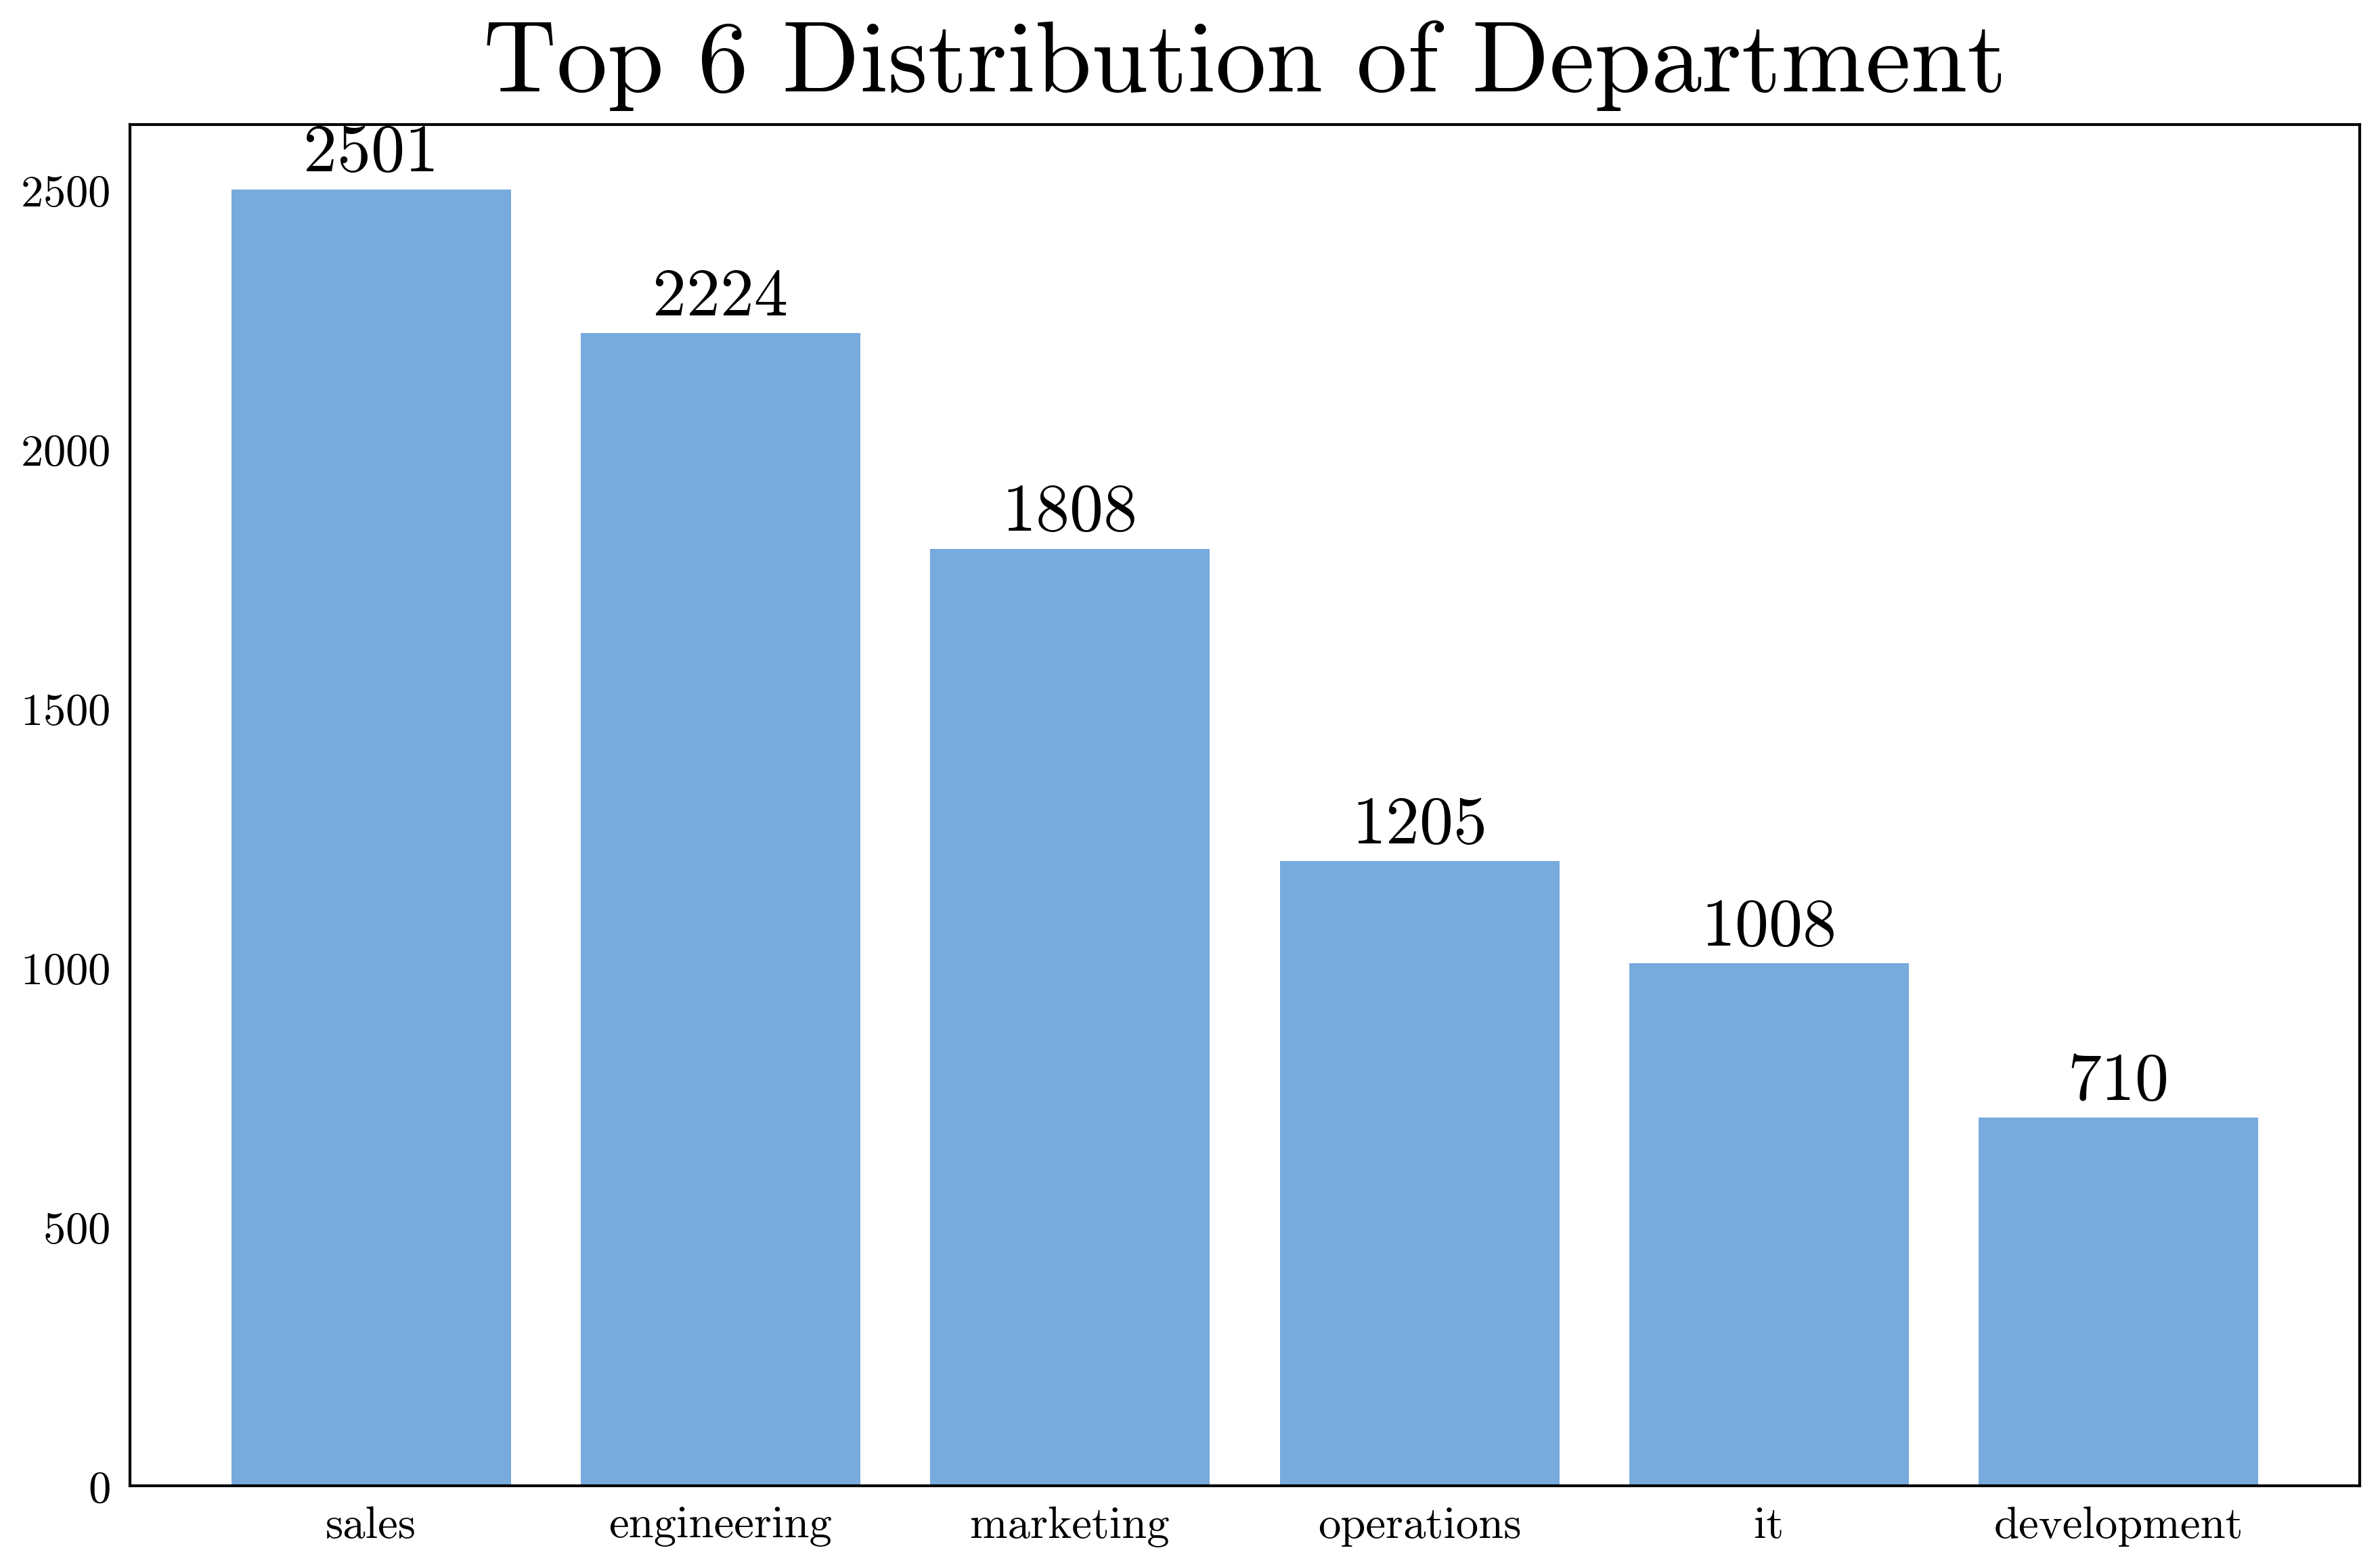

In [72]:
department = df["department"].value_counts()[:6]
labels = department.index 
values = department.values

with plt.style.context(["science", "ieee", "no-latex", "light"]):
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(labels, values, align="center")
    ax.bar_label(bars, labels=[str(value) for value in values], fontsize=12, padding=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    ax.set_title("Top 6 Distribution of Department", fontsize=18)
    plt.tight_layout()
    plt.show()

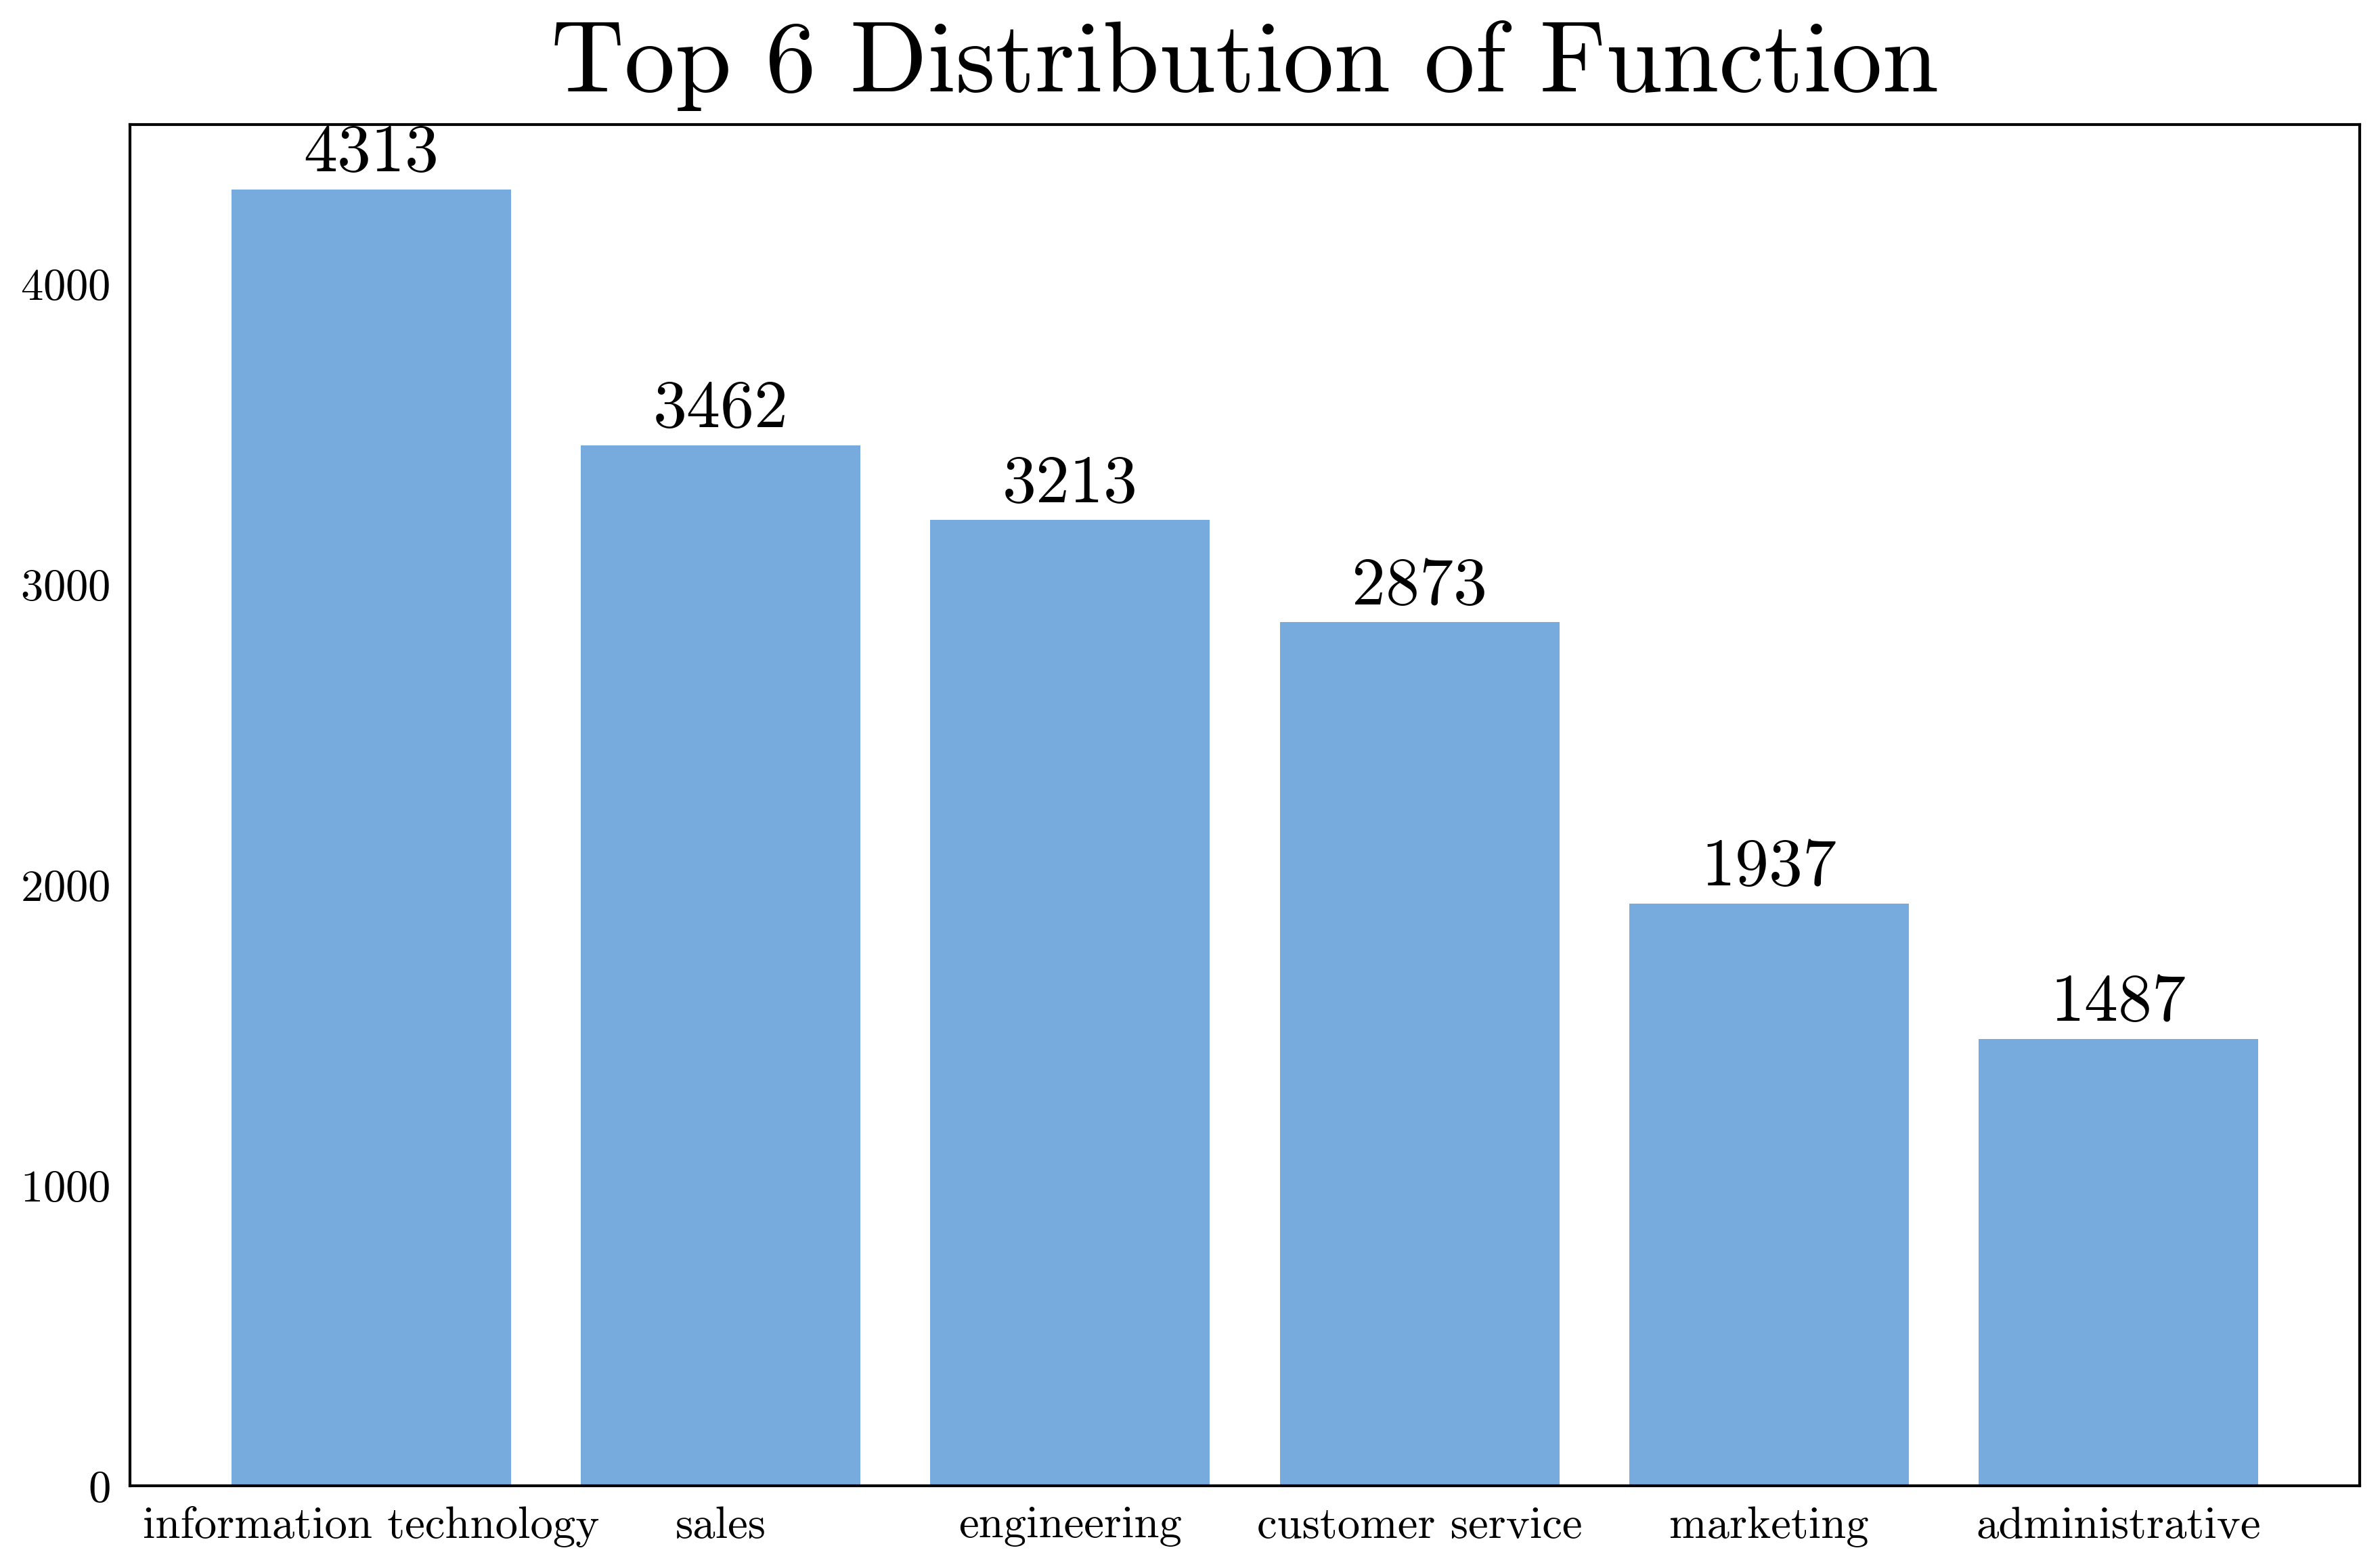

In [76]:
function = df["function"].value_counts()[:6]
labels = function.index 
values = function.values

with plt.style.context(["science", "ieee", "no-latex", "light"]):
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(labels, values, align="center")
    ax.bar_label(bars, labels=[str(value) for value in values], fontsize=12, padding=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    ax.set_title("Top 6 Distribution of Function", fontsize=18)
    plt.tight_layout()
    plt.show()

In [1]:
import os
import joblib

model_dir = "../app/models/fusion-models"

models = {}
for i in range(1, 9):
    name = f"m{i}"
    path = os.path.join(model_dir, f"{name}.joblib")
    models[name] = joblib.load(path)

In [42]:
from sklearn.model_selection import train_test_split

inputs = joblib.load(PROCESSED_DATA_DIR / "inputs.joblib")
target = joblib.load(PROCESSED_DATA_DIR / "target.joblib")
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.25, random_state=42, stratify=target)
y_train.value_counts()
# zero_indices = y_test[y_test == 0].index[0:20]
# y_test.loc[zero_indices] = 1

fraudulent
0    12632
1     8452
Name: count, dtype: int64

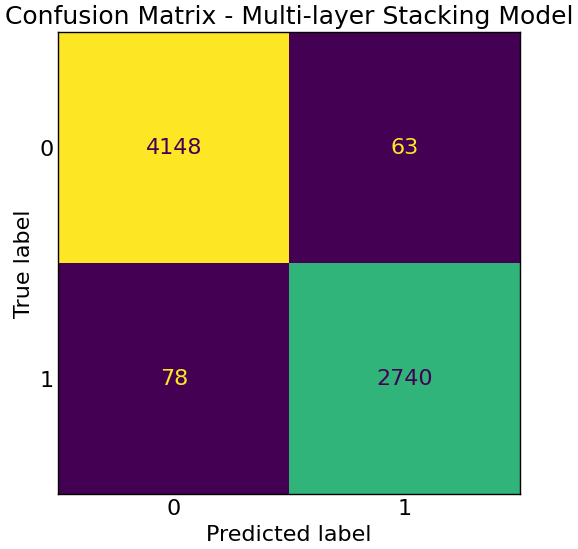

In [54]:
import joblib

multi_layer = joblib.load("../app/models/fusion-models/m8.joblib")
y_pred = multi_layer.predict(X_test)

# 绘制混淆矩阵
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, values_format="d", colorbar=False, text_kw={"fontsize": 16})
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
ax.set_title("Confusion Matrix - Multi-layer Stacking Model", fontsize=18)
plt.show()